In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cpp = [9.713, 19.395, 28.487, 36.628, 45.799, 54.880, 64.302, 75.297, 83.775, 93.153]
pytorch = [2.8497, 3.4526, 3.7248, 4.0068, 4.6116, 4.6447, 5.1509, 5.9227, 6.4131, 6.7362, 7.25357, 7.77428956, 8.254421]
stapl = [0.74289, 1.52005, 2.25441, 2.97979, 3.72645, 4.52029, 5.34859, 6.23042, 7.01844, 7.82656, 8.57175, 9.364, 10.1859]
mpi = [0.68546875, 1.3885625, 2.07925, 2.774375, 3.5228125, 4.3519375, 5.002, 5.81015625, 6.52884375, 7.3236245, 8.07471875, 8.82459375, 9.5685]
omp = [0.6965615, 1.3885625, 2.02665625, 2.5804375, 3.242875, 3.8866875, 4.56146875, 5.20228125, 5.866125, 6.5553125, 7.2620625, 7.8881875, 8.4975625]

In [3]:
time = np.arange(5e3, 65e3 + 1, 5e3)

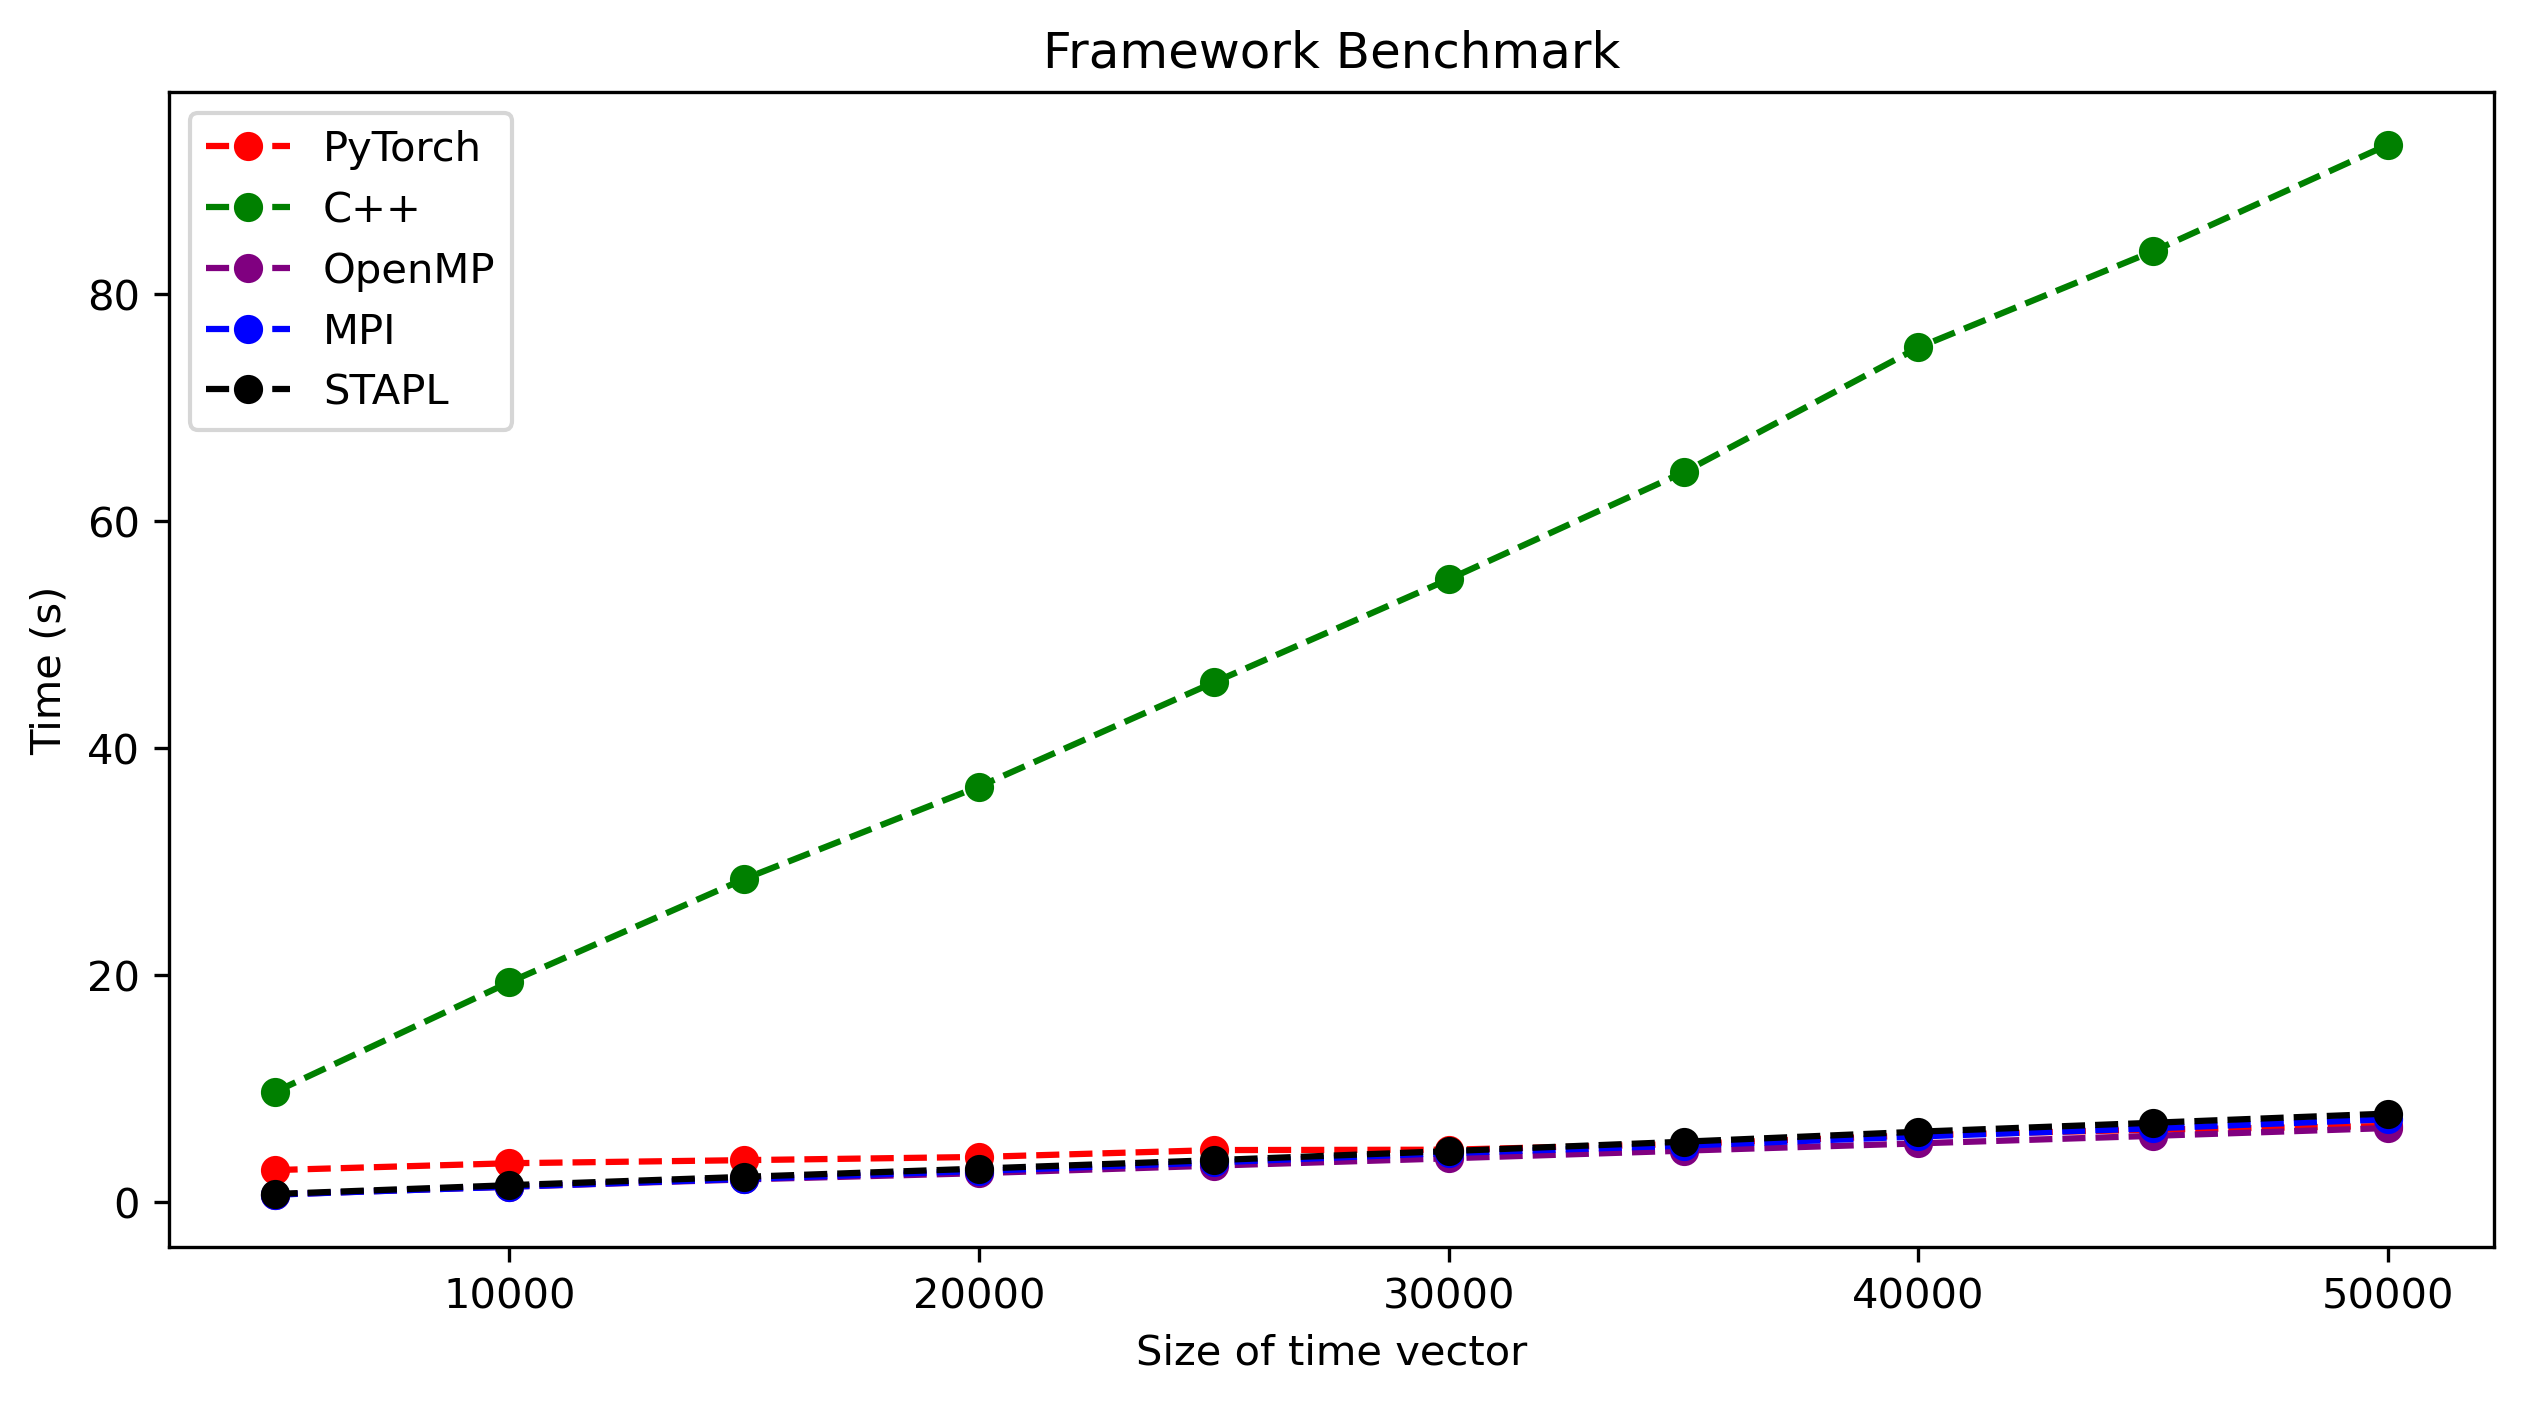

In [4]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Framework Benchmark")
plt.plot(time[:10], pytorch[:10], label="PyTorch", marker='o', linestyle='--', color='red')
plt.plot(time[:10], cpp, label="C++", marker='o', linestyle='--', color='green')
plt.plot(time[:10], omp[:10], label="OpenMP", marker='o', linestyle='--', color='purple')
plt.plot(time[:10], mpi[:10], label="MPI", marker='o', linestyle='--', color='blue')
plt.plot(time[:10], stapl[:10], label="STAPL", marker='o', linestyle='--', color='black')
plt.legend()
plt.xlabel("Size of time vector")
plt.ylabel("Time (s)")
plt.savefig("../img/framework_benchmark.png")
plt.show()

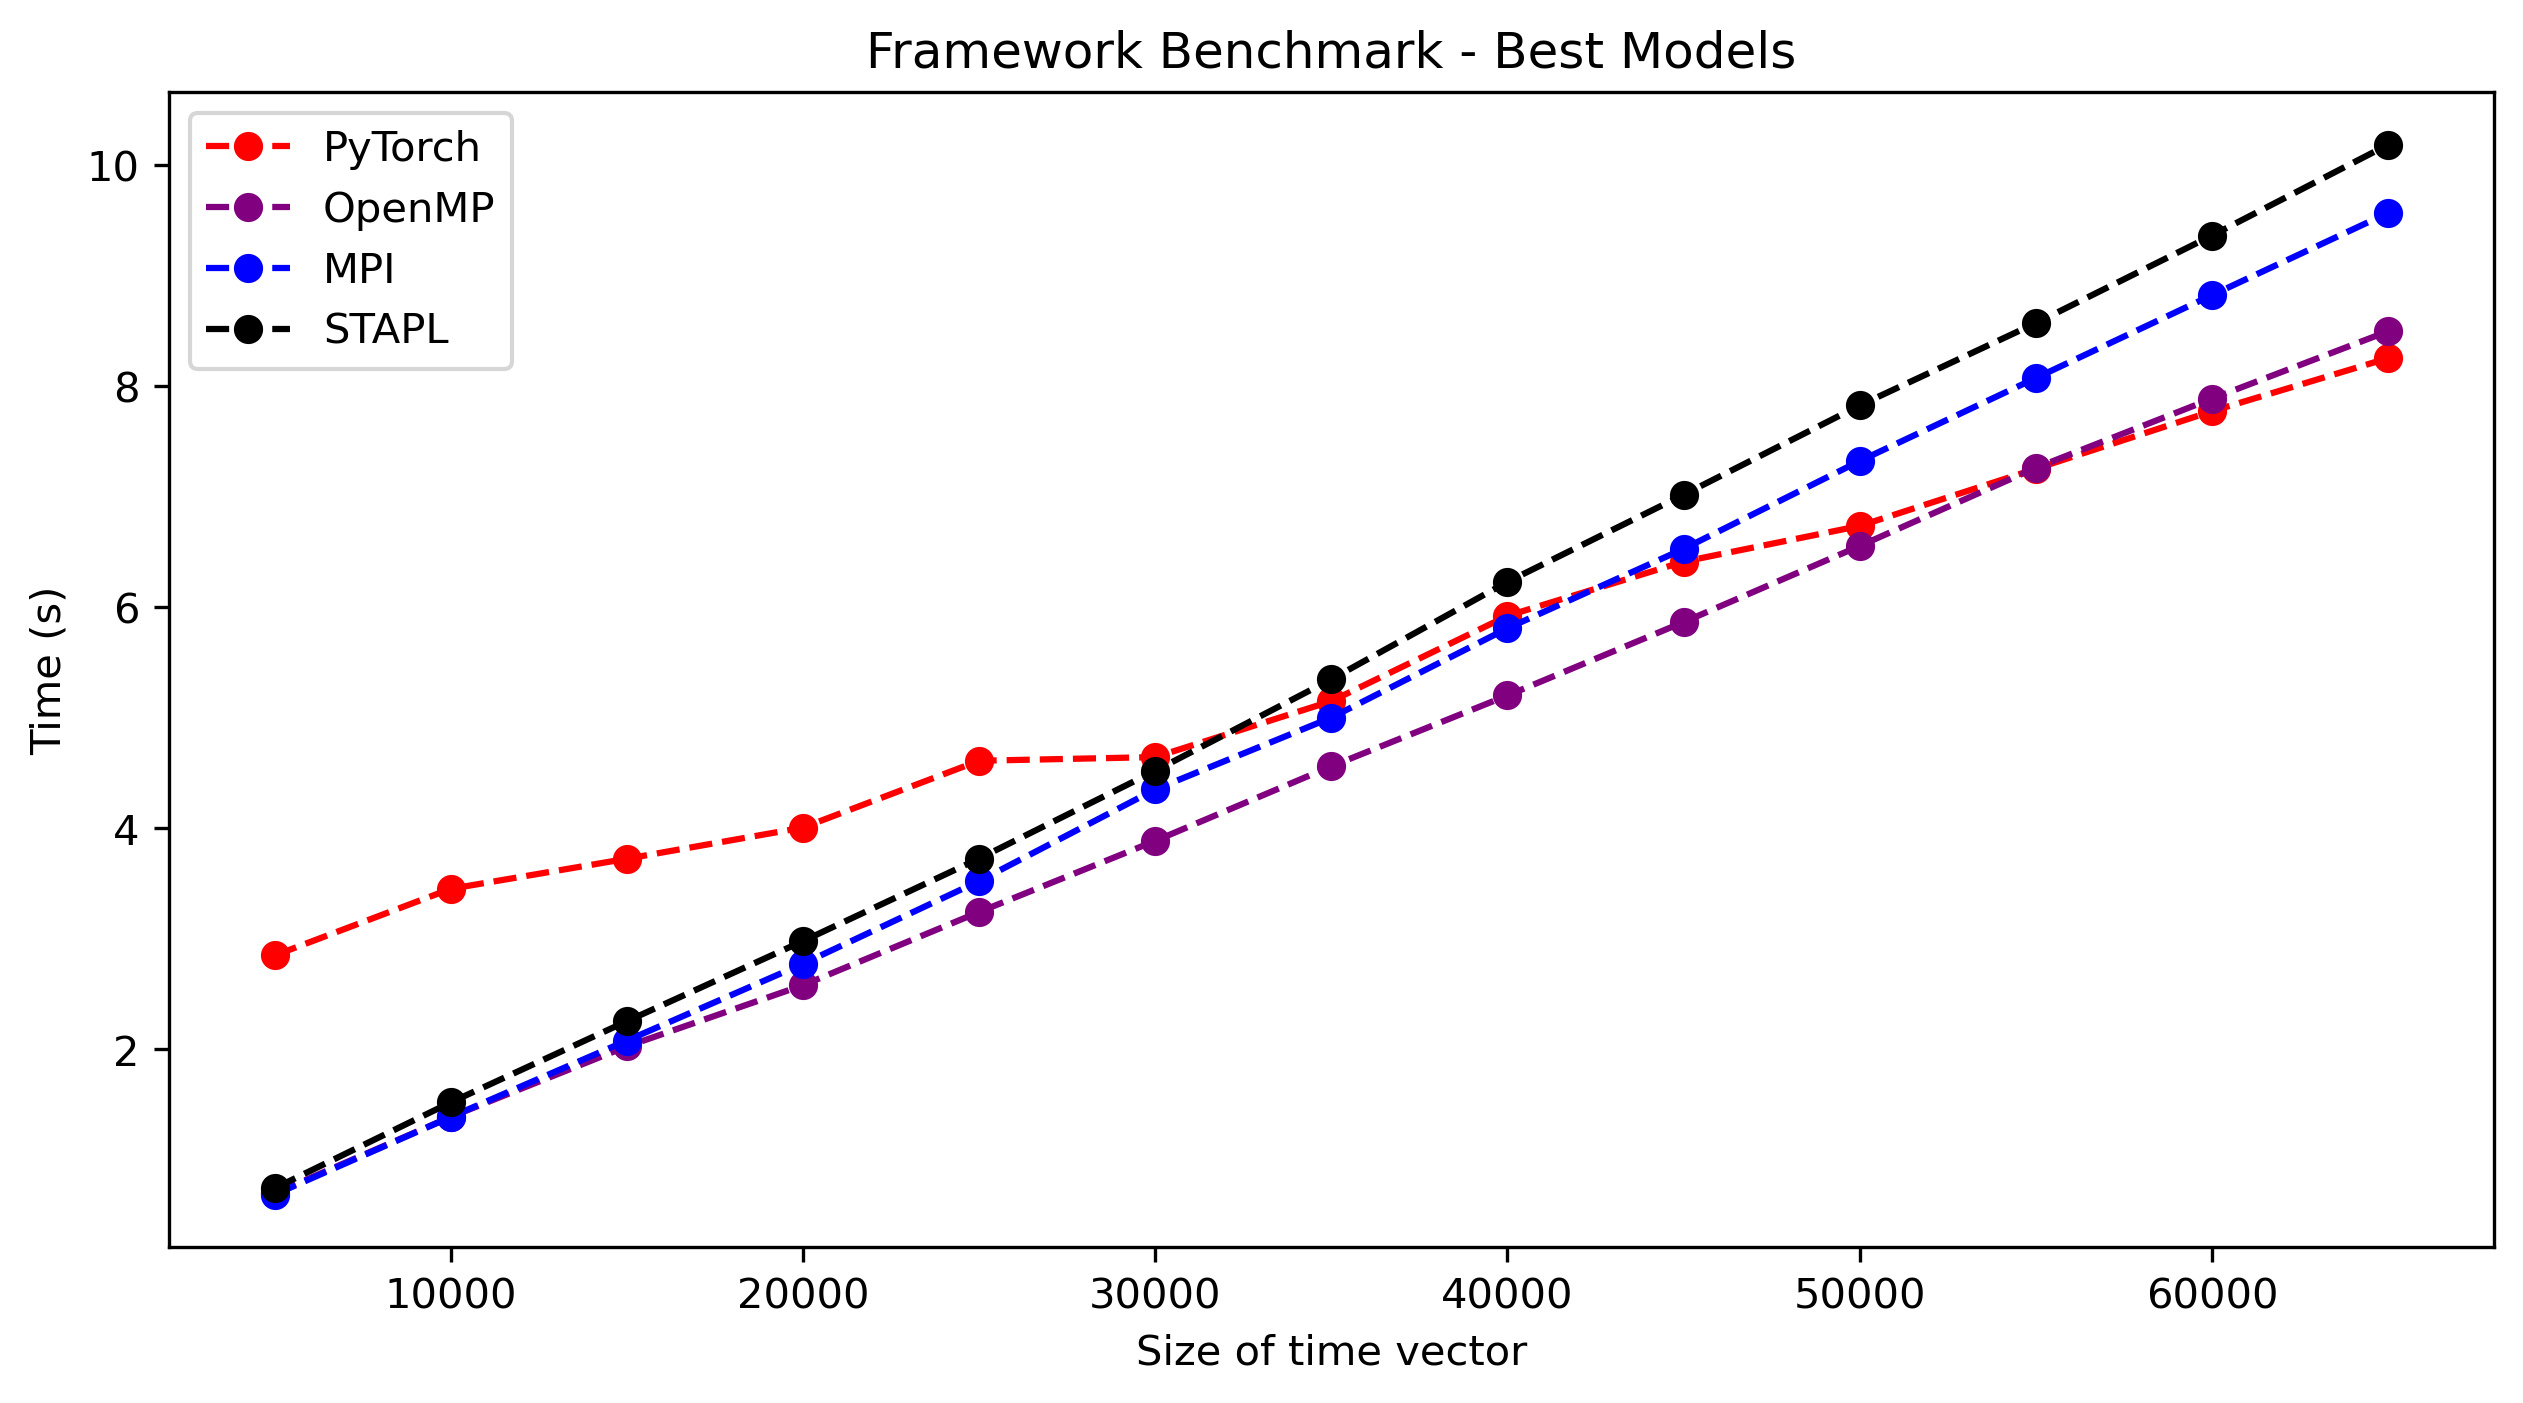

In [5]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Framework Benchmark - Best Models")
plt.plot(time, pytorch, label="PyTorch", marker='o', linestyle='--', color='red')
plt.plot(time, omp, label="OpenMP", marker='o', linestyle='--', color='purple')
plt.plot(time, mpi, label="MPI", marker='o', linestyle='--', color='blue')
plt.plot(time, stapl, label="STAPL", marker='o', linestyle='--', color='black')
plt.xlabel("Size of time vector")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("../img/framework_benchmark_best.png")
plt.show()

In [6]:
nodes = [2**x for x in range(5)]

In [7]:
omp = [8.349375, 4.33265625, 2.2128125, 1.11503125, 0.65046875]
mpi = [8.96553125, 4.6768125, 2.3986875, 1.20084375, 0.70490625]
stapl = [8.97633, 4.82175, 2.50905, 1.2471, 0.743409]

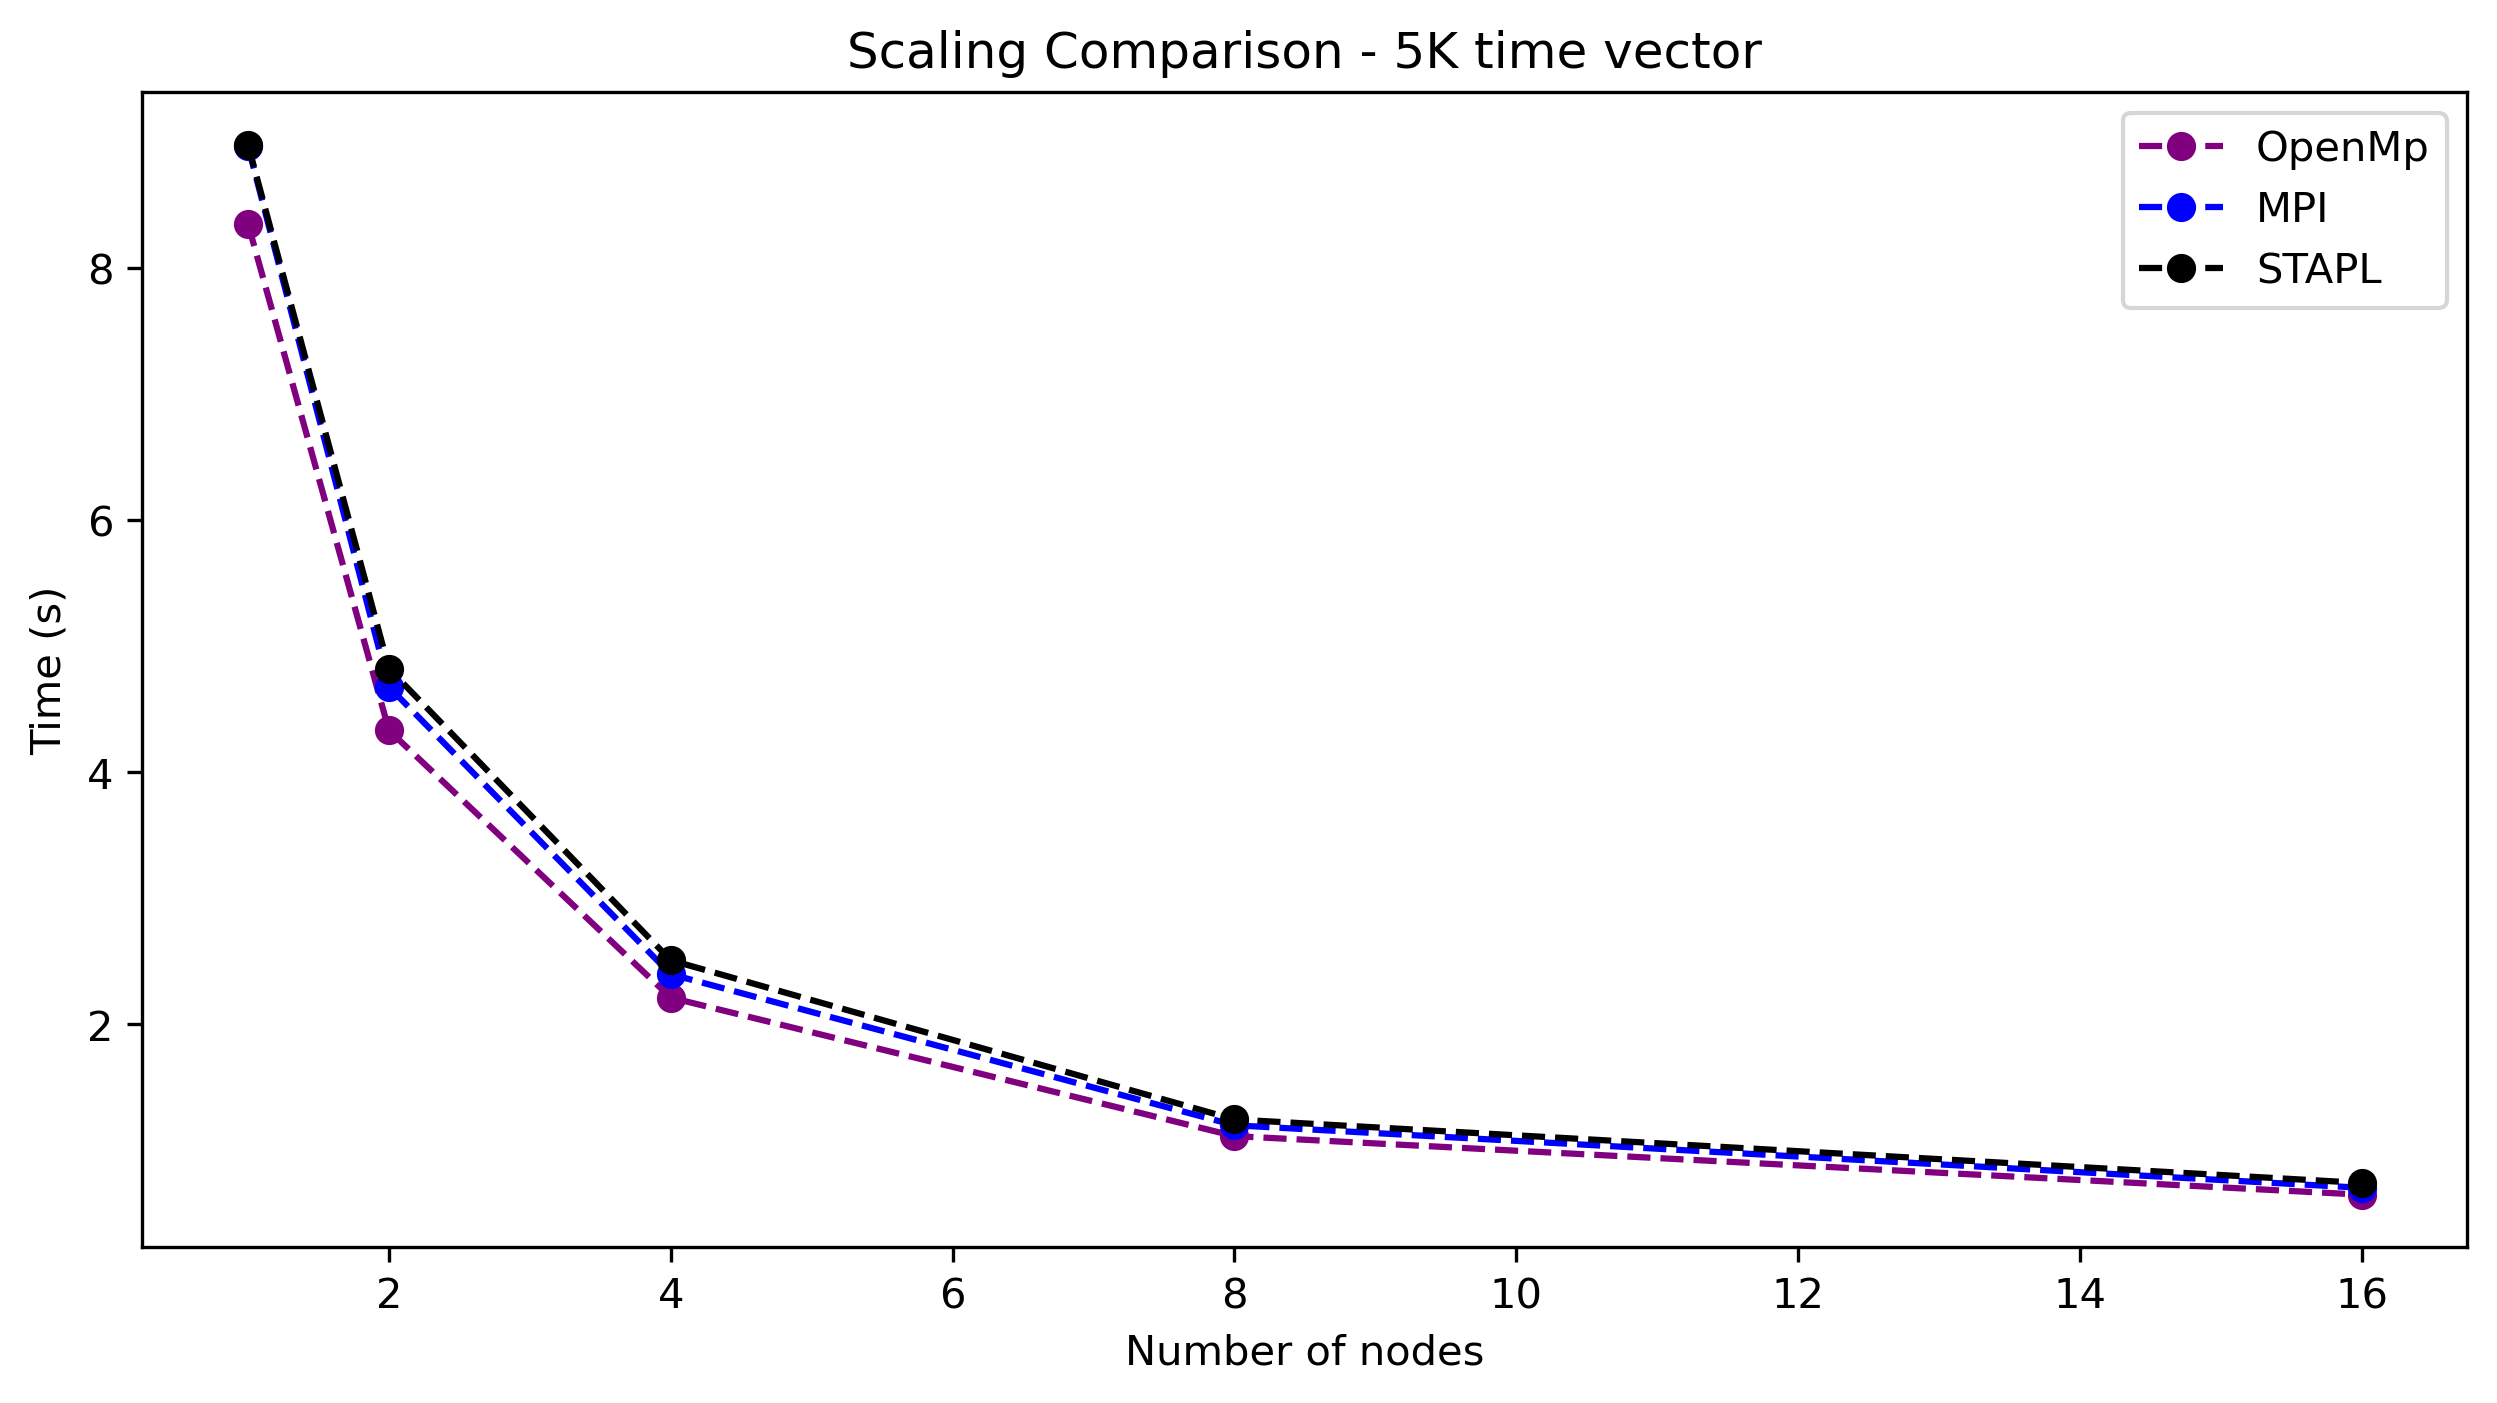

In [8]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Scaling Comparison - 5K time vector")
plt.plot(nodes, omp, label="OpenMp", marker='o', linestyle='--', color='purple')
plt.plot(nodes, mpi, label="MPI", marker='o', linestyle='--', color='blue')
plt.plot(nodes, stapl, label="STAPL", marker='o', linestyle='--', color='black')
plt.xlabel("Number of nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("../img/scaling_comparison.png")
plt.show()

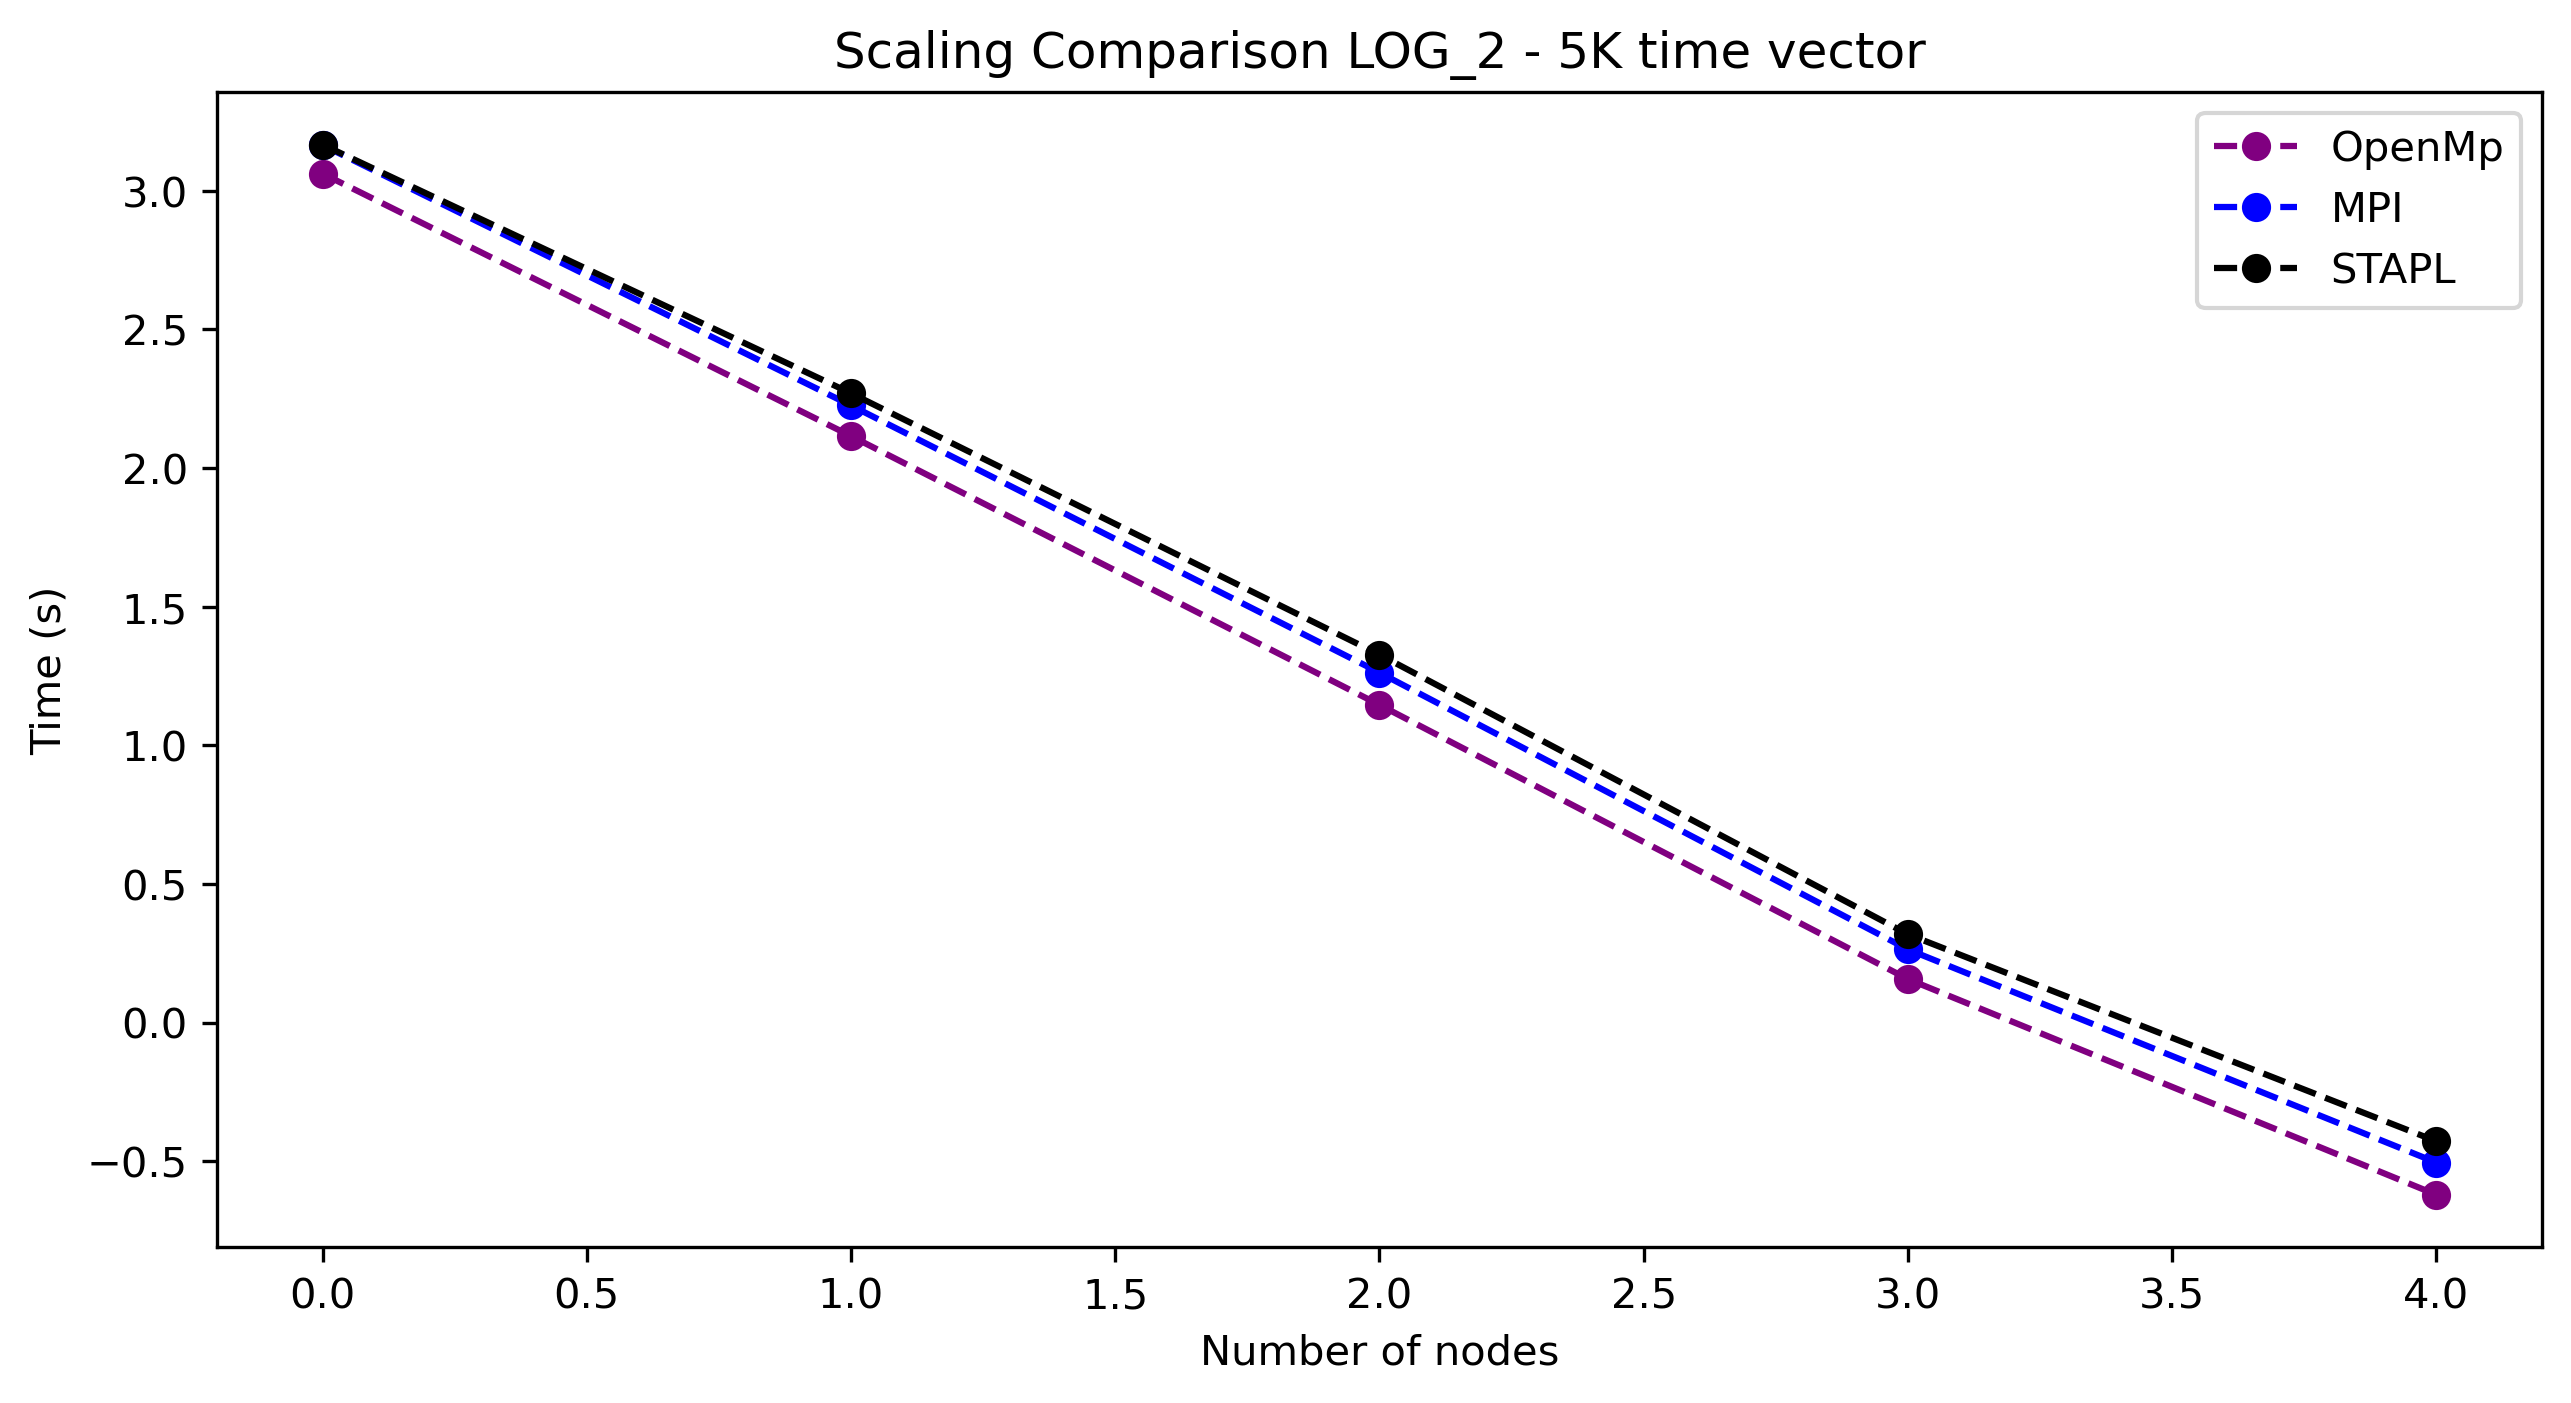

In [9]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Scaling Comparison LOG_2 - 5K time vector")
plt.plot(np.log2(nodes), np.log2(omp), label="OpenMp", marker='o', linestyle='--', color='purple')
plt.plot(np.log2(nodes), np.log2(mpi), label="MPI", marker='o', linestyle='--', color='blue')
plt.plot(np.log2(nodes), np.log2(stapl), label="STAPL", marker='o', linestyle='--', color='black')
plt.xlabel("Number of nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("../img/scaling_comparison_log2.png")
plt.show()

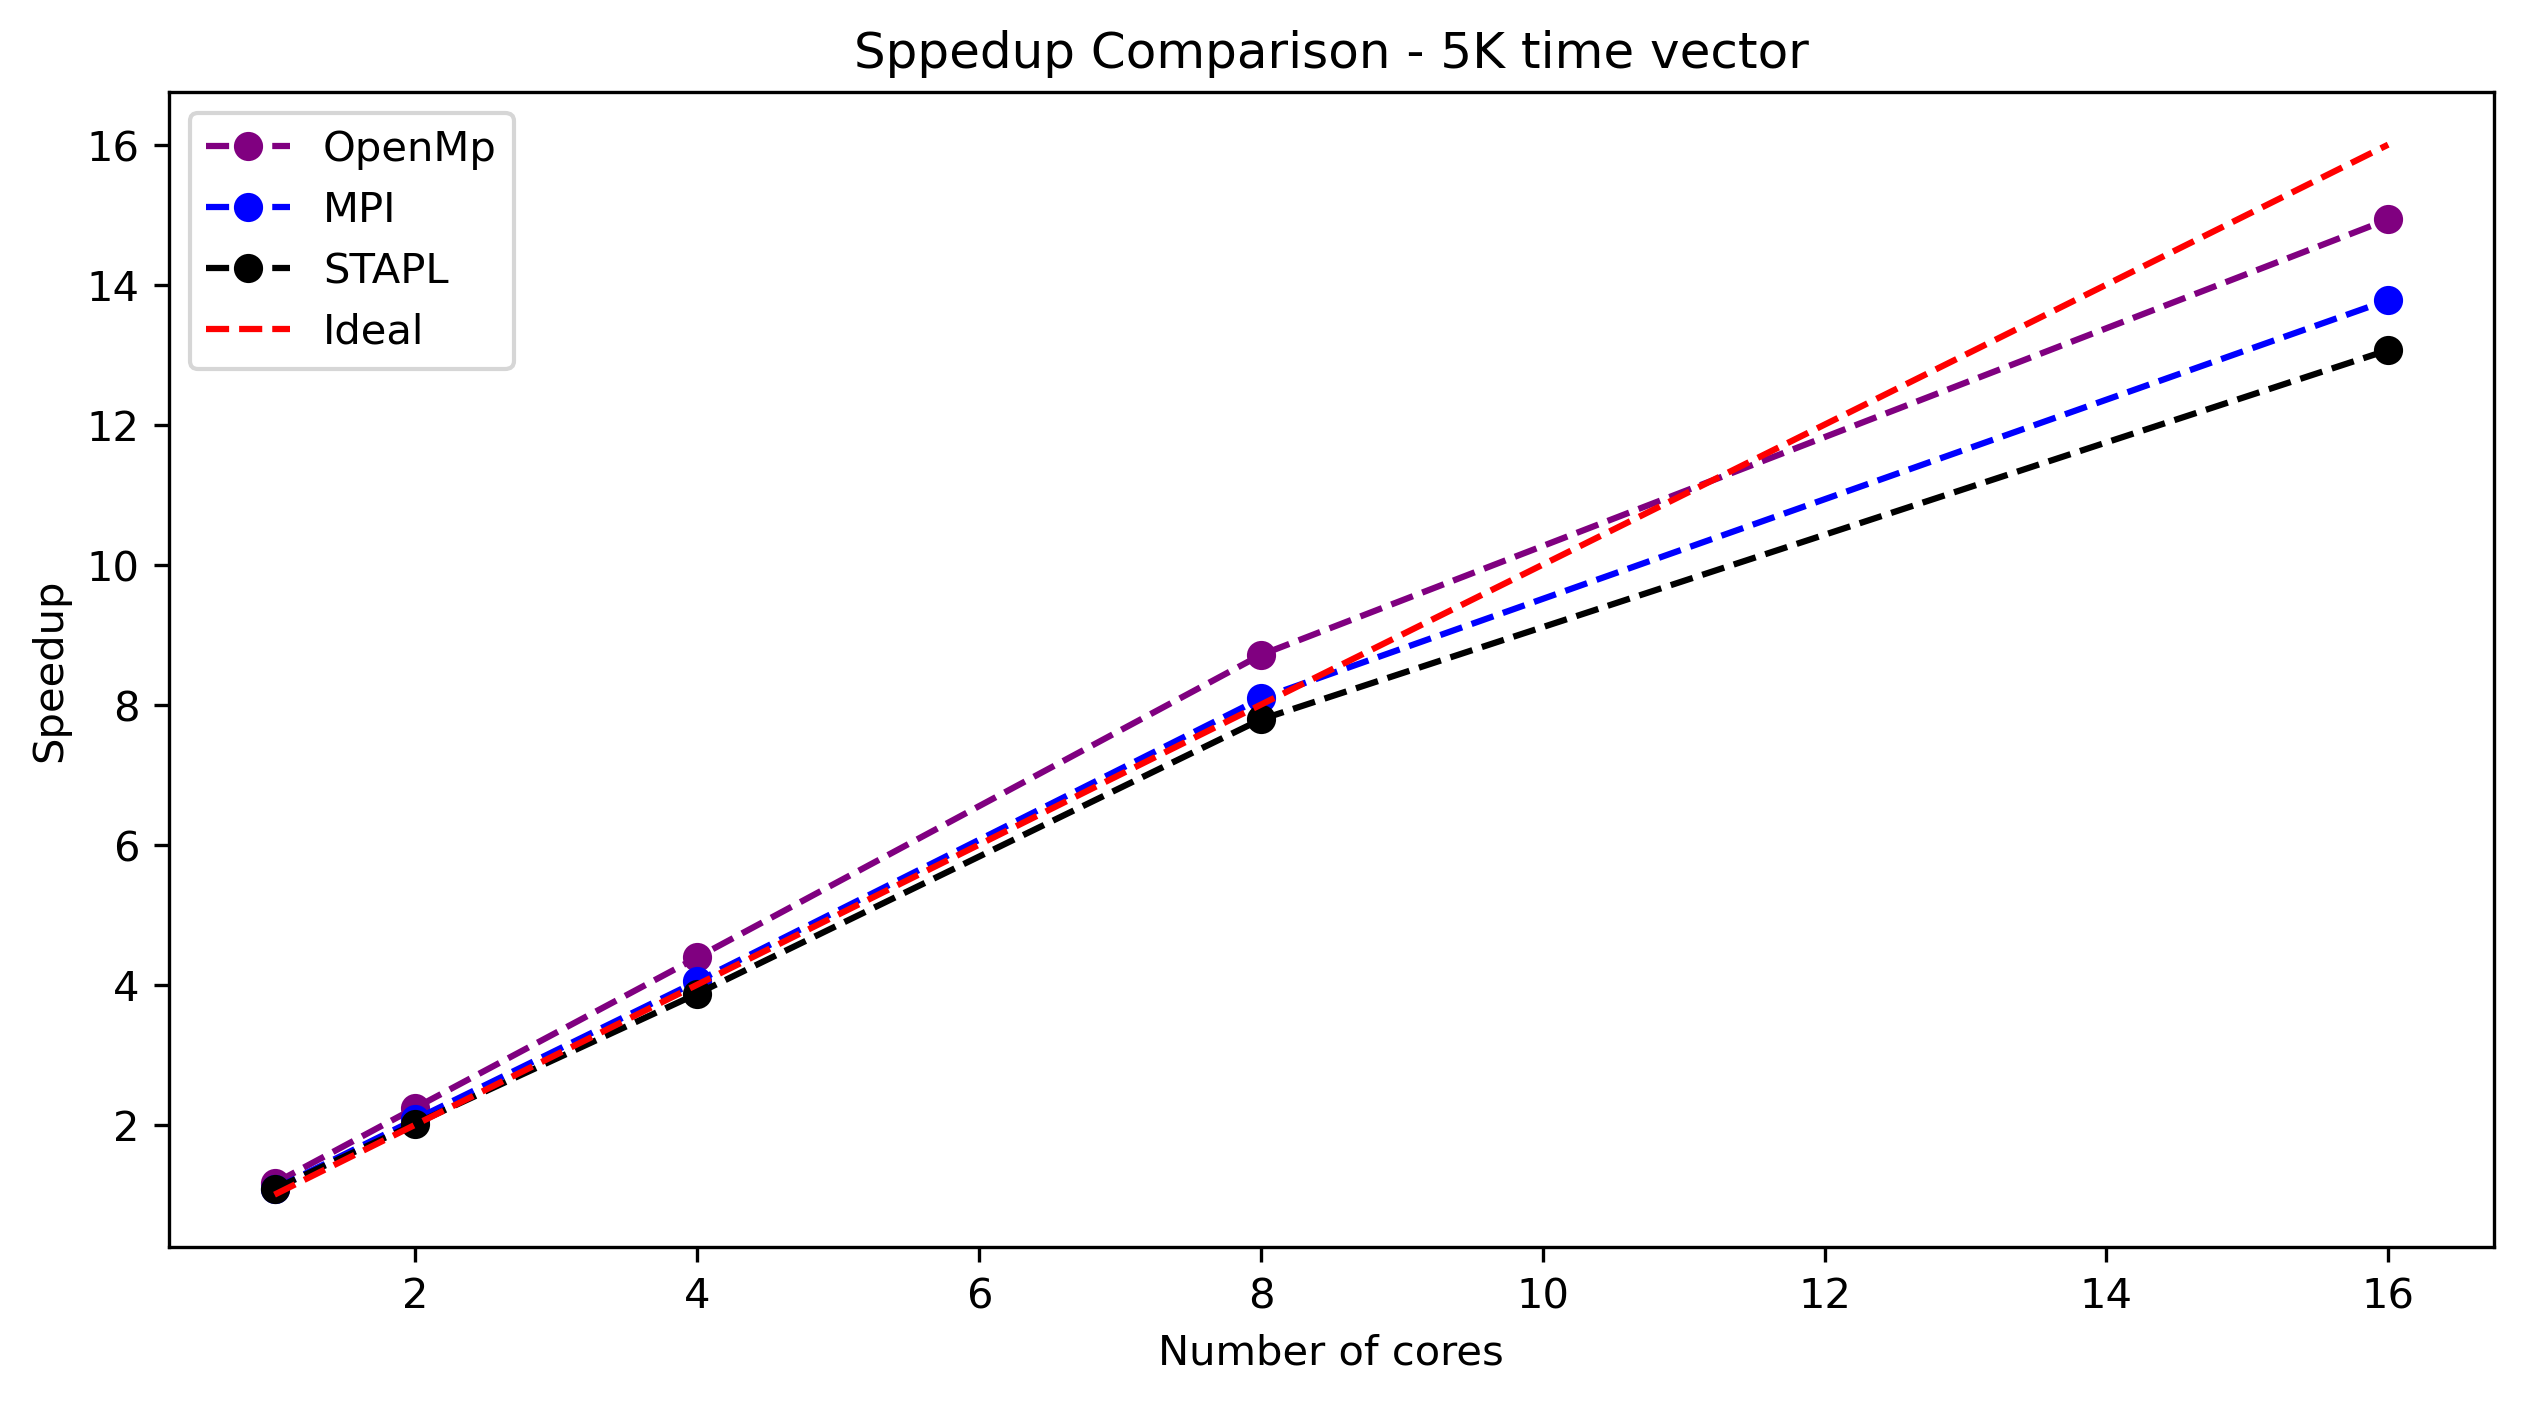

In [10]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Sppedup Comparison - 5K time vector")
plt.plot(nodes, cpp[0] / np.array(omp), label="OpenMp", marker='o', linestyle='--', color='purple')
plt.plot(nodes, cpp[0] / np.array(mpi), label="MPI", marker='o', linestyle='--', color='blue')
plt.plot(nodes, cpp[0] / np.array(stapl), label="STAPL", marker='o', linestyle='--', color='black')
plt.plot(nodes, nodes, label="Ideal", linestyle='--', color='red')
plt.xlabel("Number of cores")
plt.ylabel("Speedup")
plt.legend()
plt.savefig("../img/speedup_comparison.png")
plt.show()

## Data using all parasol machines

In [11]:
from pathlib import Path

In [12]:
LOG_OMP = Path.cwd() / "log_bls_omp.txt"
LOG_MPI = Path.cwd() / "log_bls_mpi.txt"
LOG_STPAL = Path.cwd() / "log_bls_stpal.txt"
LOG_GLOBAL = Path.cwd() / "log_bls_global.txt"

In [17]:
results_omp = {}
results_mpi = {}
results_stapl = {}
results_global = {}

with open(LOG_OMP, 'r') as f:
    lines = f.readlines()
    for i in range(0, len(lines), 10):
        size = int(lines[i].split()[1])
        threads = int(lines[i].split()[2])
        time = float(lines[i+5].split()[3]) / 1000
        results_omp[(size, threads)] = time
        
with open(LOG_MPI, 'r') as f:
    lines = f.readlines()
    for i in range(0, len(lines), 10):
        size = int(lines[i].split()[6])
        threads = int(lines[i].split()[4])
        time = float(lines[i+5].split()[3]) / 1000
        results_mpi[(size, threads)] = time
        
with open(LOG_STPAL, 'r') as f:
    lines = f.readlines()
    for i in range(0, len(lines), 8):
        size = int(lines[i].split()[6])
        threads = int(lines[i].split()[4])
        time = float(lines[i+4].split()[2])
        results_stapl[(size, threads)] = time
        
with open(LOG_GLOBAL, 'r') as f:
    lines = f.readlines()
    for i in range(0, len(lines), 10):
        size = int(lines[i].split()[1])
        time = float(lines[i+5].split()[3]) / 1000
        results_global[(size)] = time
    

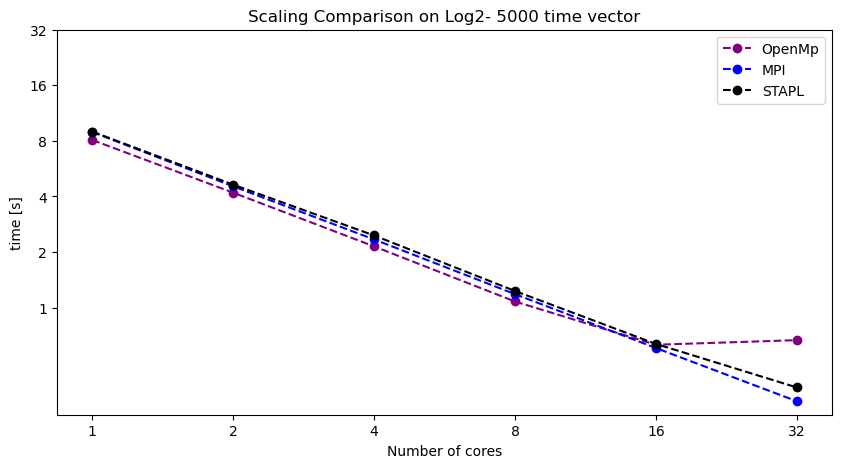

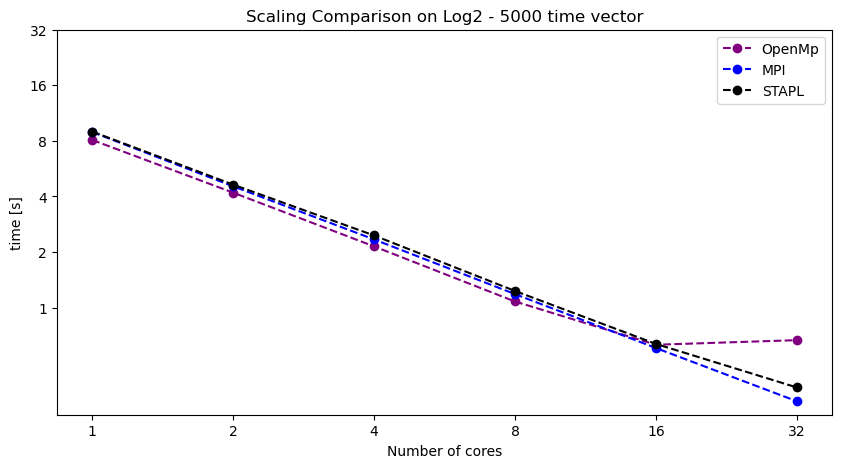

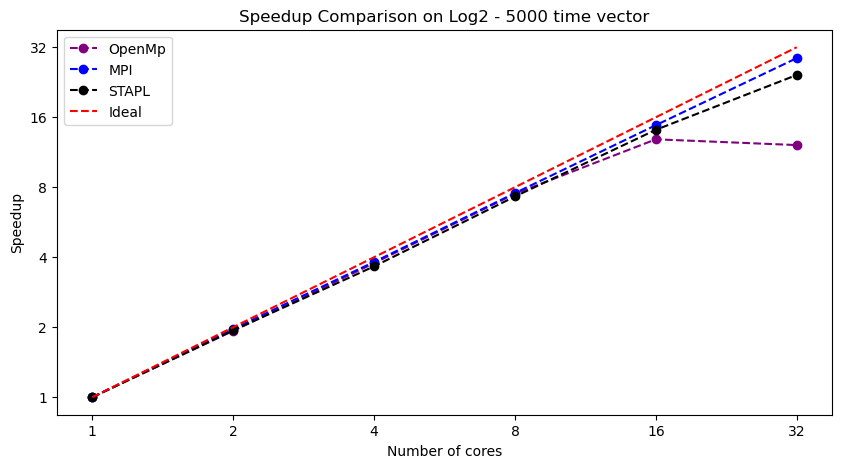

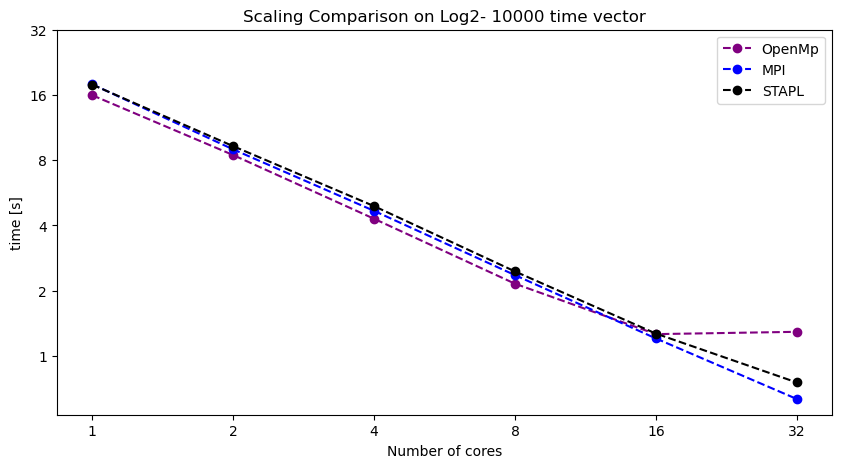

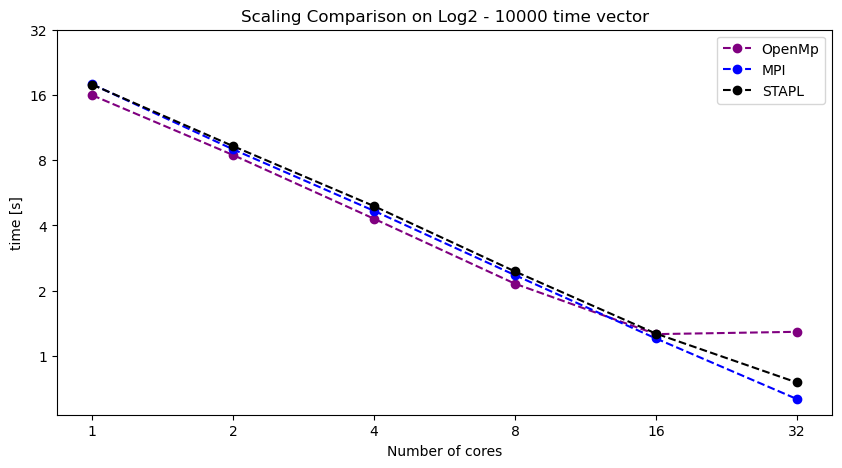

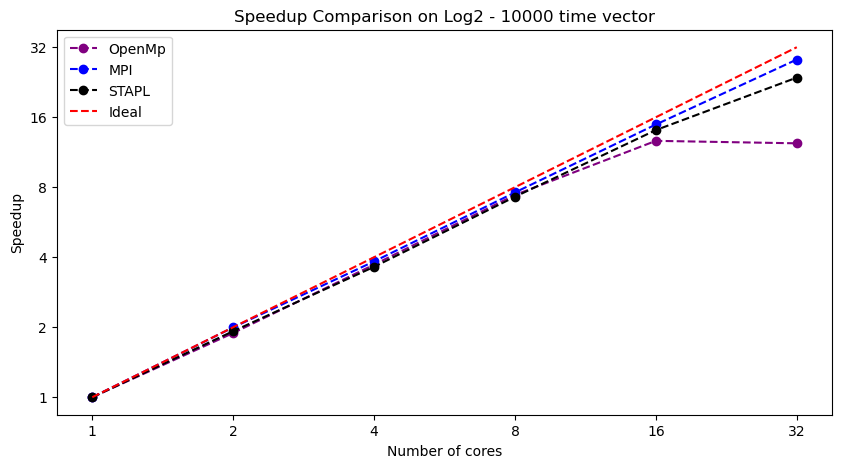

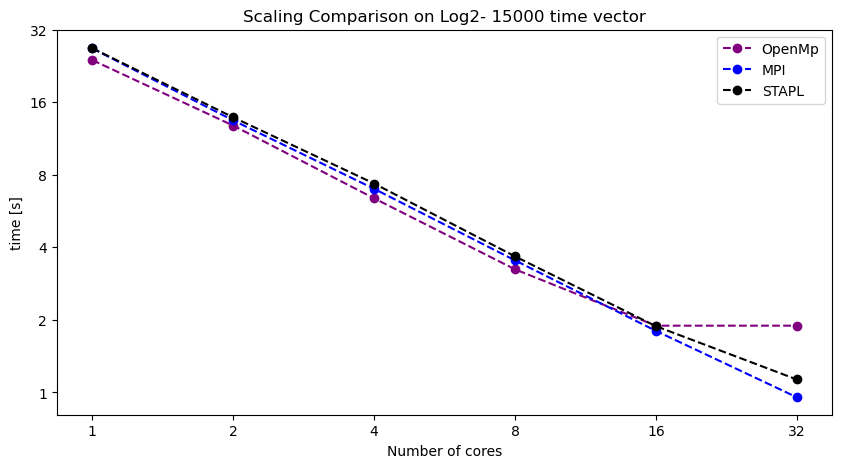

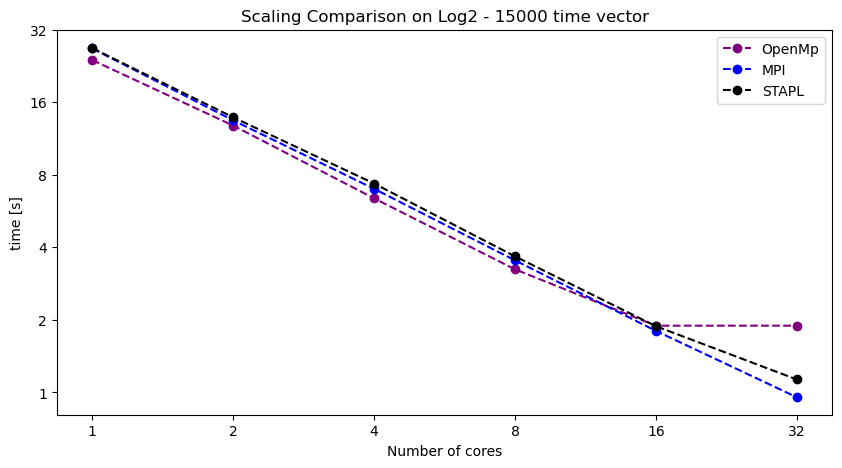

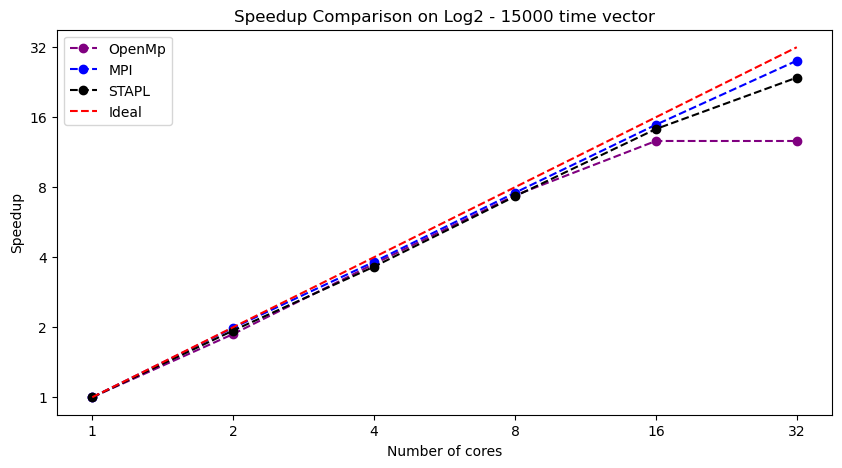

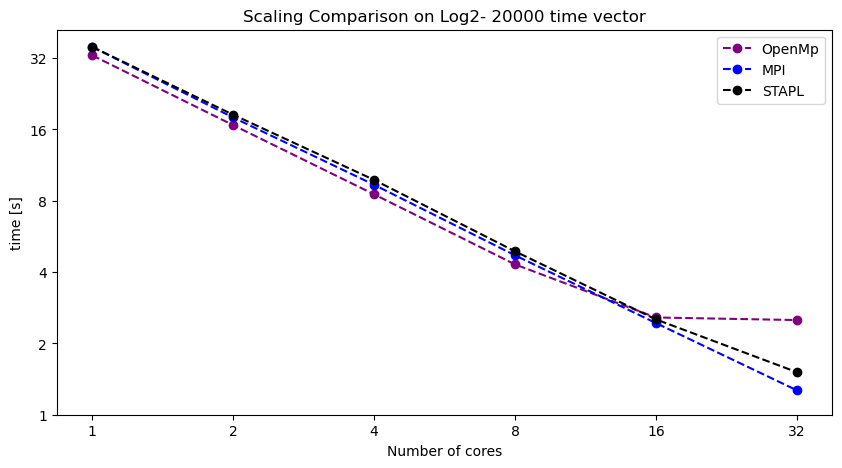

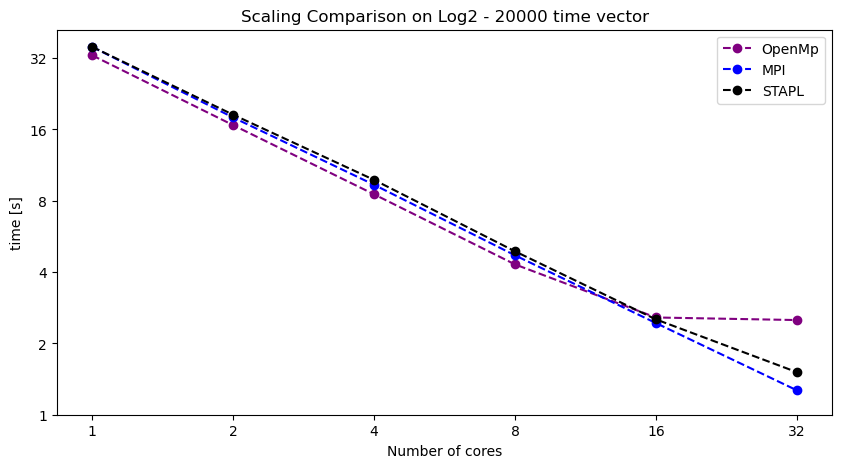

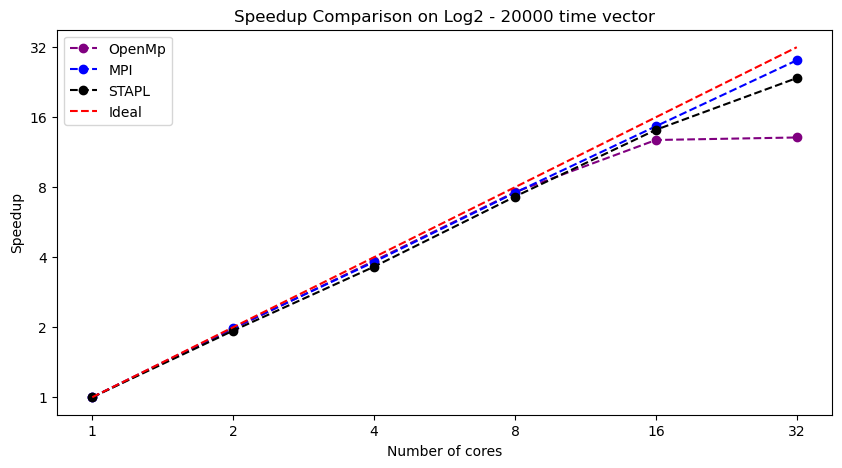

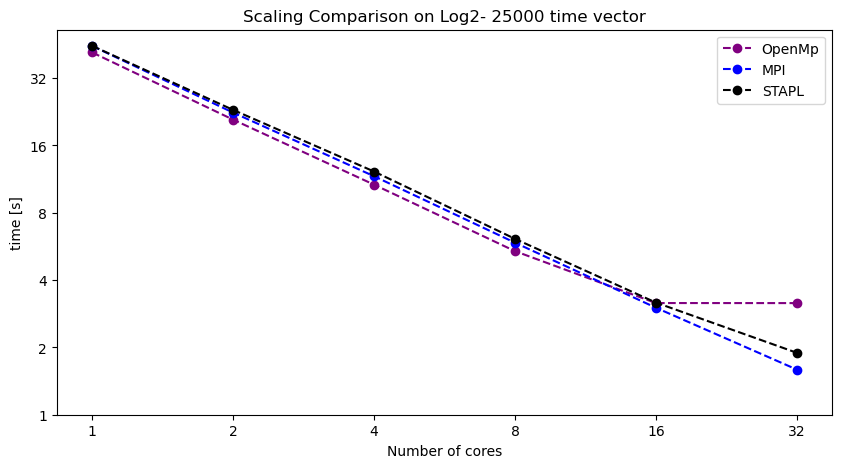

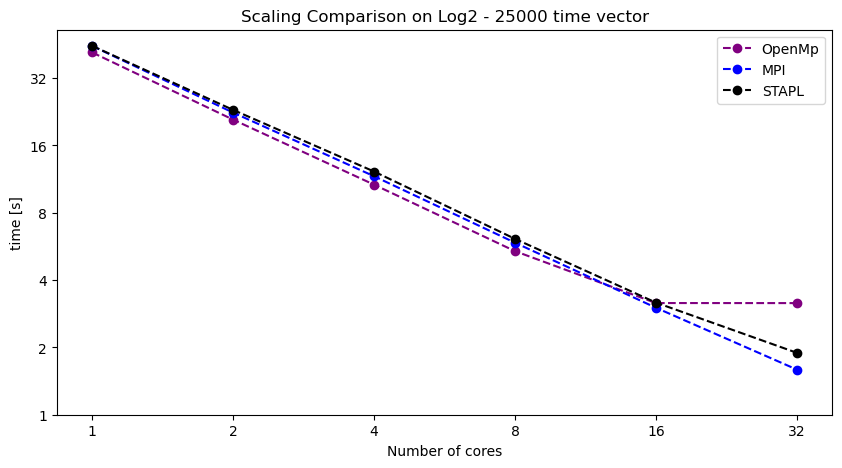

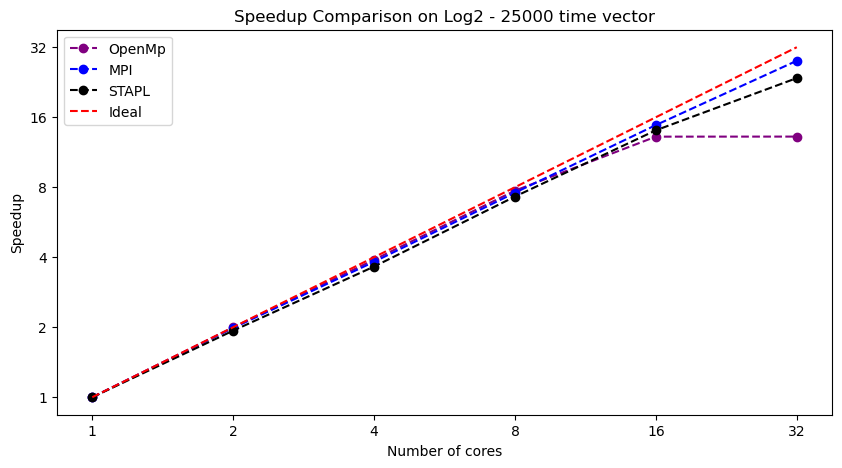

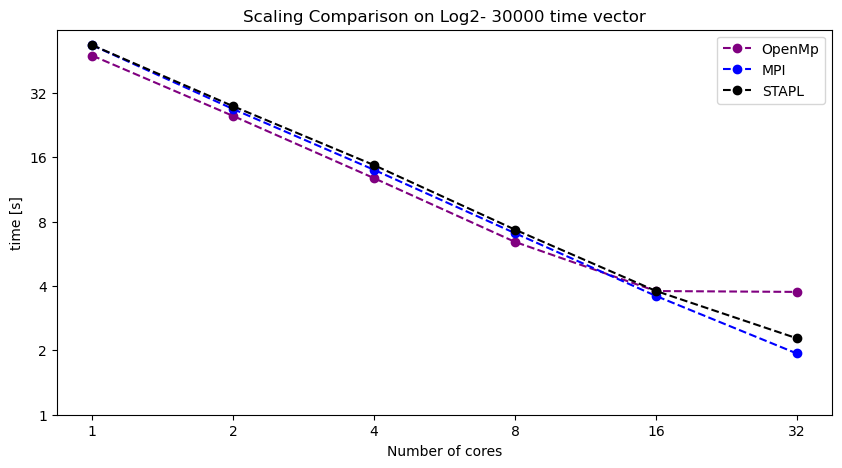

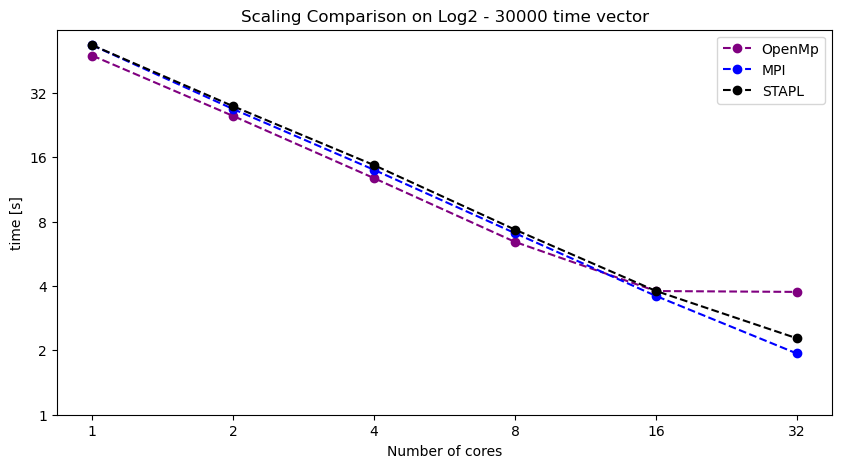

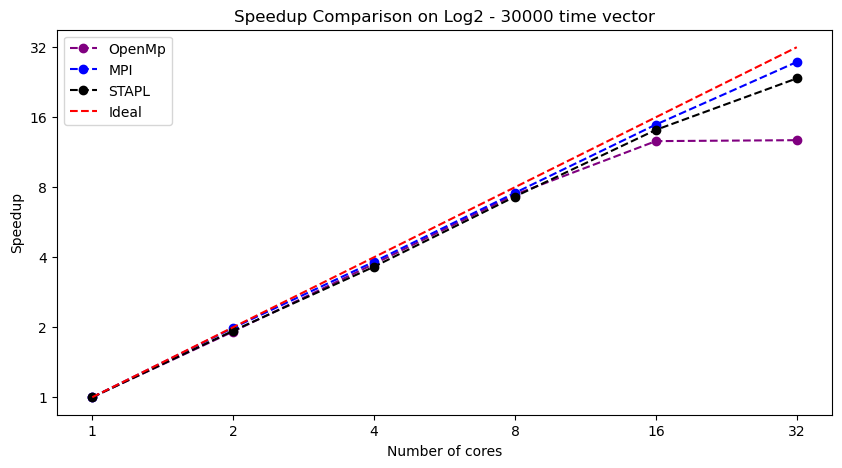

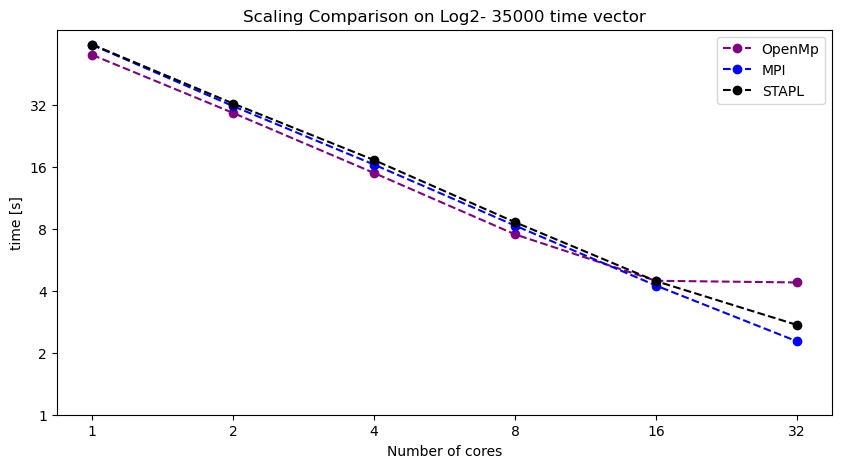

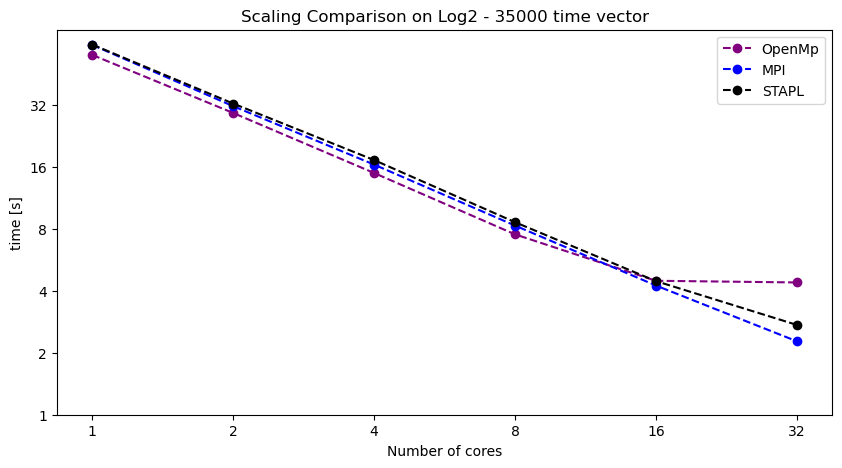

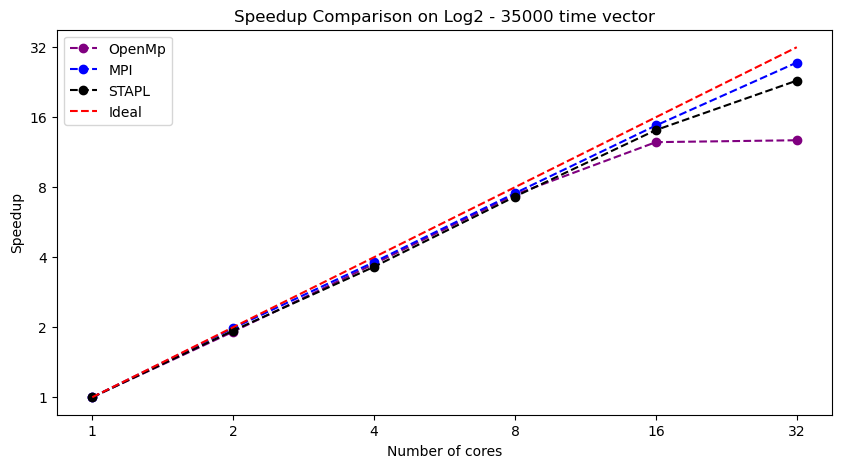

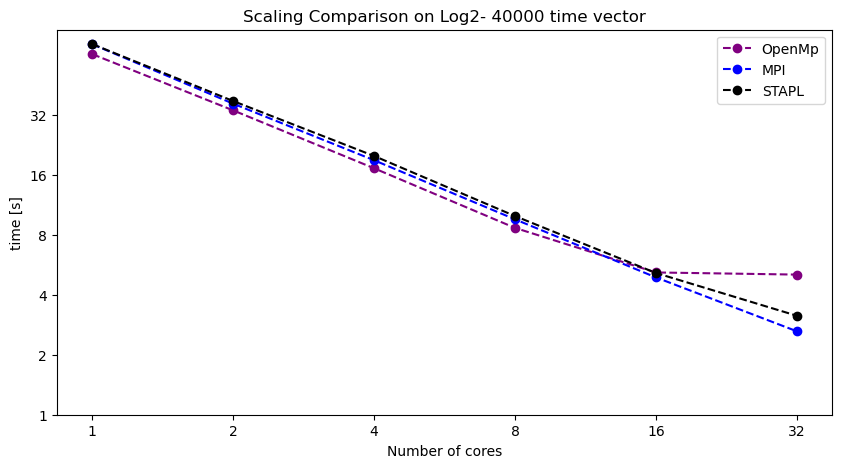

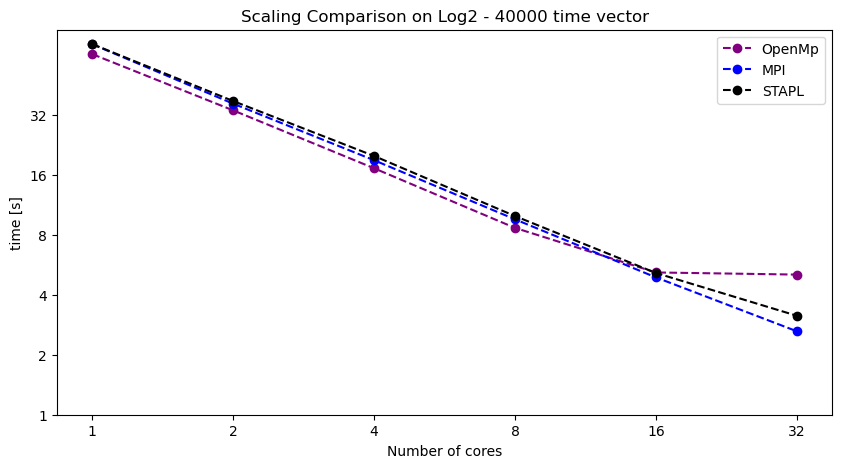

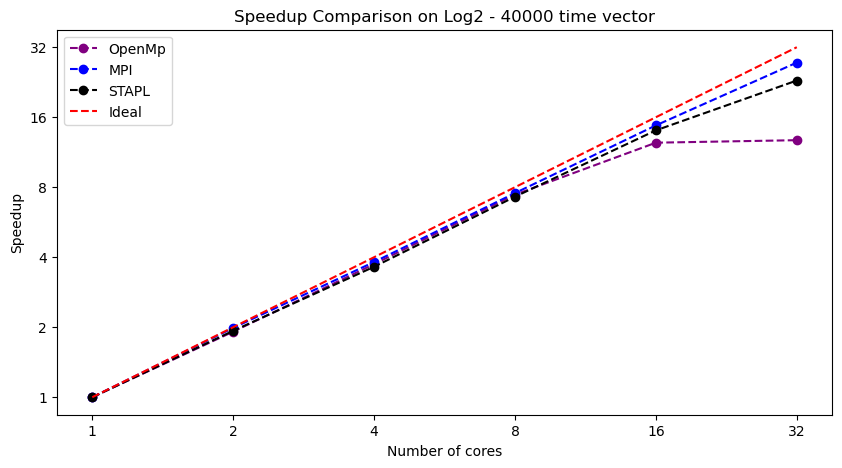

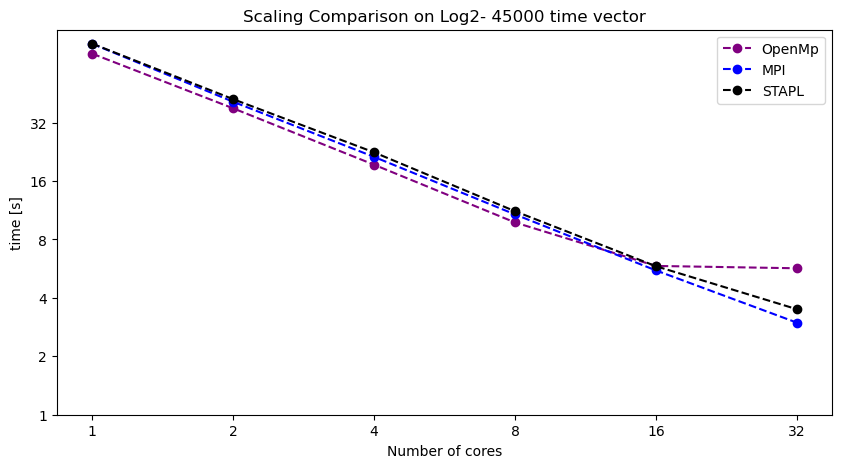

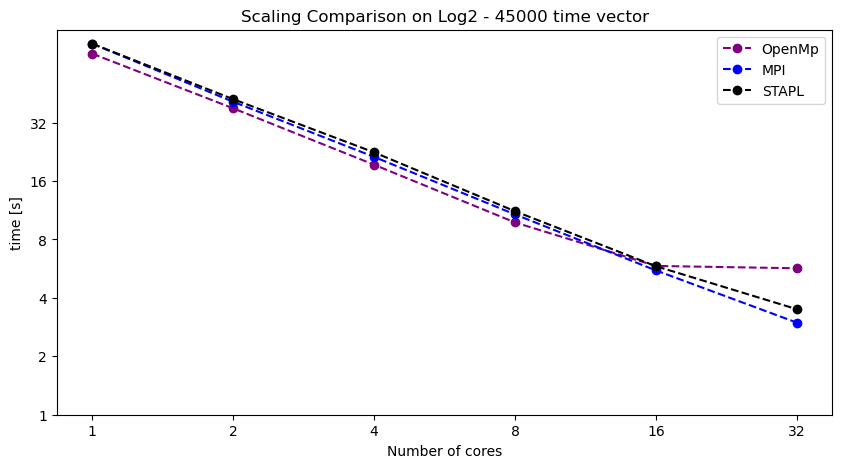

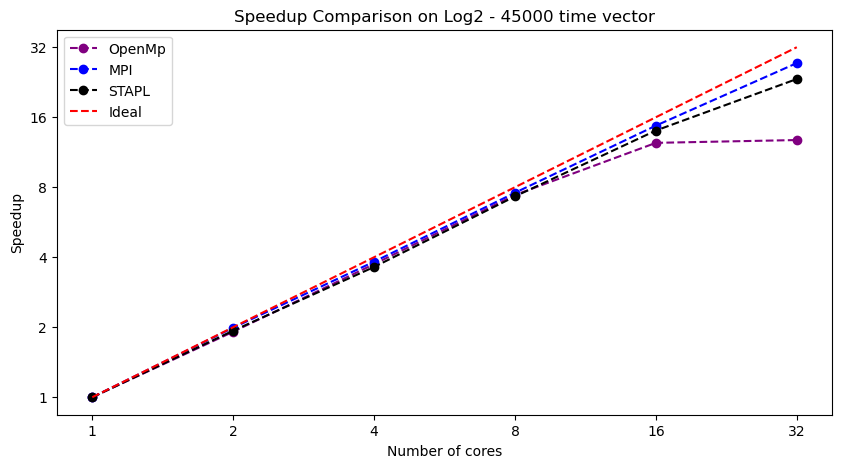

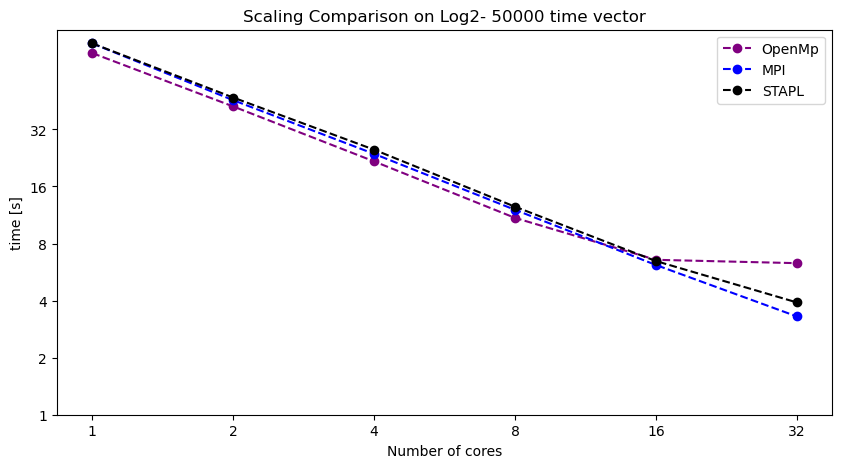

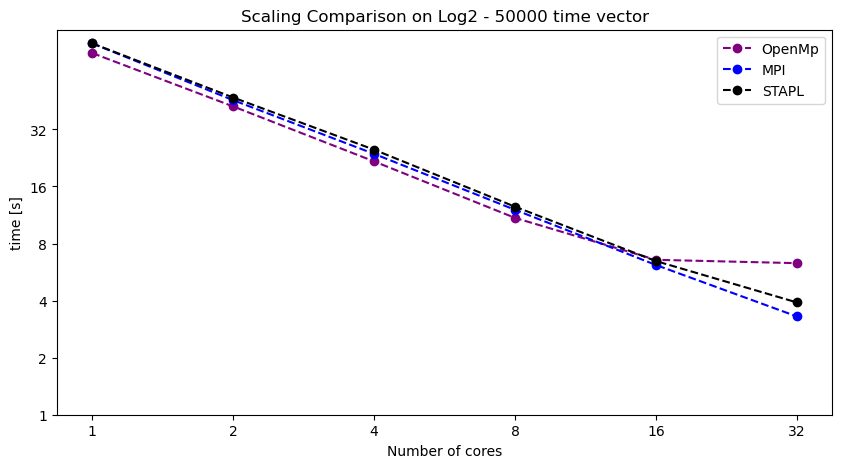

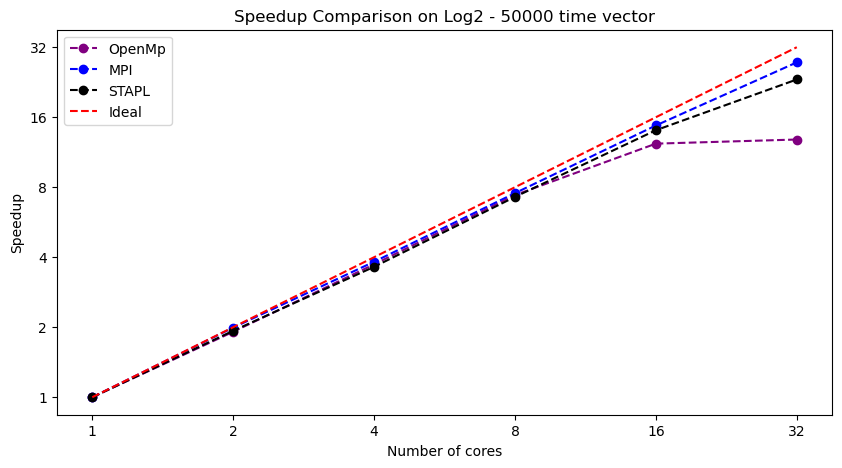

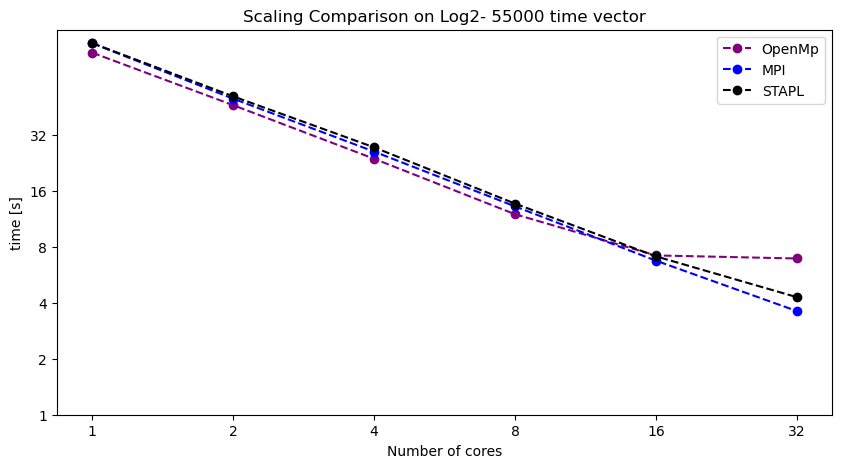

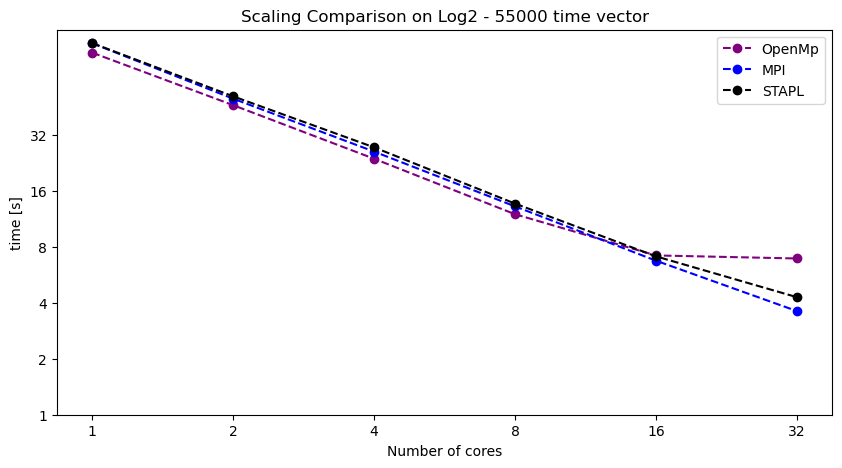

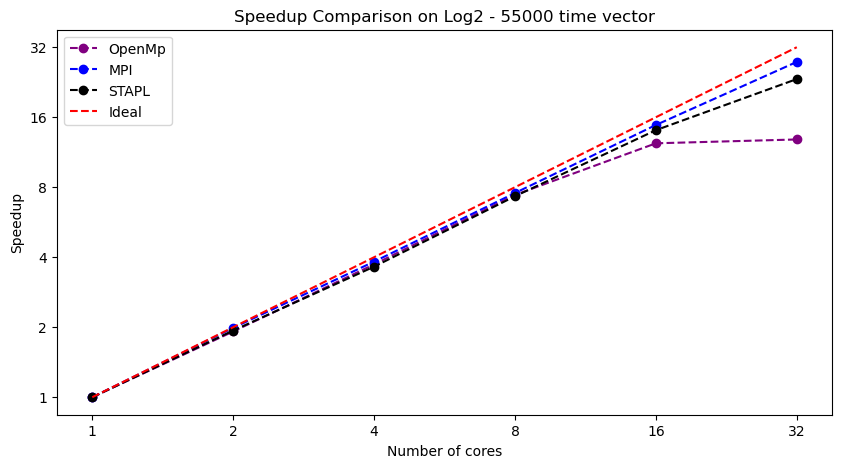

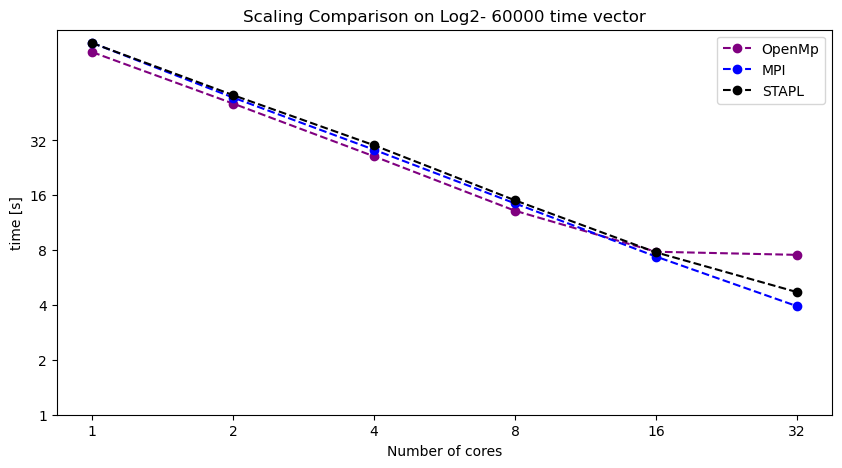

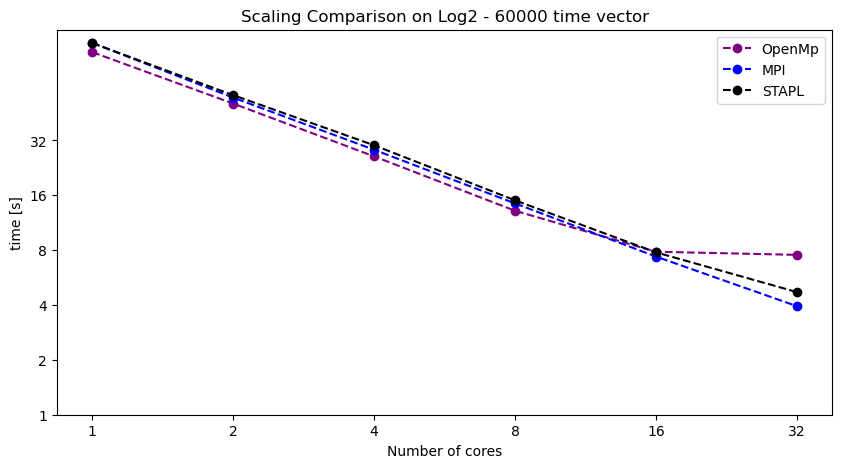

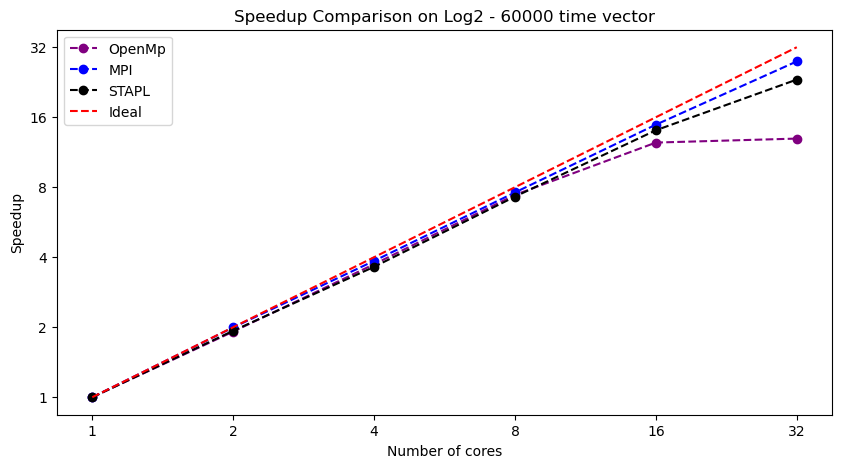

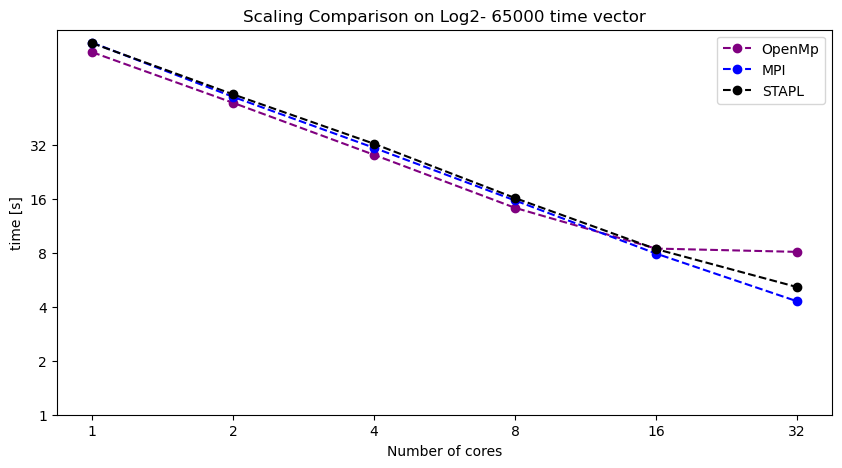

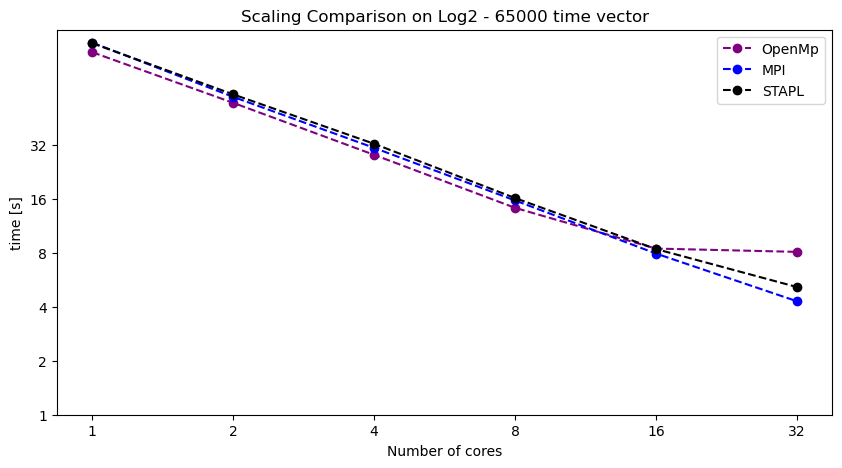

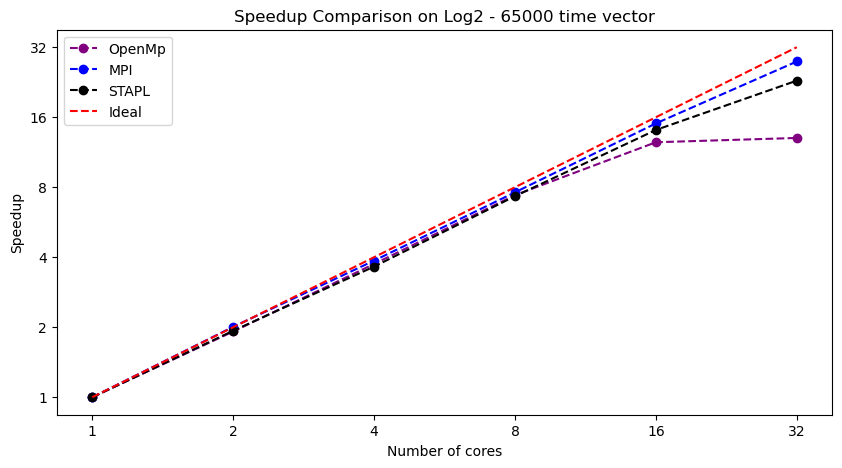

In [27]:
threads = [2**x for x in range(6)]
for size in range(5000, 65000 + 1, 5000):
    times_omp = [results_omp[(size, thread)] for thread in threads]
    times_mpi = [results_mpi[(size, node)] for node in threads]
    times_stapl = [results_stapl[(size, node)] for node in threads]

    plt.figure(figsize=(10, 5))
    plt.title(f"Scaling Comparison on Log2- {size} time vector")
    plt.plot(
        threads, times_omp, label="OpenMp", marker="o", linestyle="--", color="purple"
    )
    plt.plot(threads, times_mpi, label="MPI", marker="o", linestyle="--", color="blue")
    plt.plot(
        threads, times_stapl, label="STAPL", marker="o", linestyle="--", color="black"
    )
    plt.xlabel("Number of cores")
    plt.ylabel("time [s]")
    plt.xscale("log", base=2)
    plt.yscale("log", base=2)
    plt.xticks(threads, threads)
    plt.yticks(threads, threads)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title(f"Scaling Comparison on Log2 - {size} time vector")
    plt.plot(
        threads, times_omp, label="OpenMp", marker="o", linestyle="--", color="purple"
    )
    plt.plot(threads, times_mpi, label="MPI", marker="o", linestyle="--", color="blue")
    plt.plot(
        threads, times_stapl, label="STAPL", marker="o", linestyle="--", color="black"
    )
    plt.xlabel("Number of cores")
    plt.ylabel("time [s]")
    plt.xscale("log", base=2)
    plt.yscale("log", base=2)
    plt.xticks(threads, threads)
    plt.yticks(threads, threads)
    plt.legend()
    plt.show()

    speedup_omp = times_omp[0] / np.array(times_omp)
    speedup_mpi = times_mpi[0] / np.array(times_mpi)
    speedup_stapl = times_stapl[0] / np.array(times_stapl)

    plt.figure(figsize=(10, 5))
    plt.title(f"Speedup Comparison on Log2 - {size} time vector")
    plt.plot(
        threads, speedup_omp, label="OpenMp", marker="o", linestyle="--", color="purple"
    )
    plt.plot(
        threads, speedup_mpi, label="MPI", marker="o", linestyle="--", color="blue"
    )
    plt.plot(
        threads, speedup_stapl, label="STAPL", marker="o", linestyle="--", color="black"
    )
    plt.plot(threads, threads, label="Ideal", linestyle="--", color="red")
    plt.xlabel("Number of cores")
    plt.ylabel("Speedup")
    plt.xscale("log", base=2)
    plt.yscale("log", base=2)
    plt.xticks(threads, threads)
    plt.yticks(threads, threads)
    plt.legend()
    plt.show()

All tests were performed using Parasol machines, specifically from work-01 to work-03. Each machine has 18 cores, so the OpenMP results for 32 cores utilized some virtual cores. This is not the same as using 32 physical cores, resulting in a decrease in performance.

For MPI, an SSH connection was established between the machines, allowing the work to be distributed among them. The same configuration applies to STAPL.